# Exploratory Data Analysis on Hotel Booking Dataset

In this notebook, we will perform exploratory data analysis (EDA) on the hotel booking dataset to understand the data better and uncover insights that can inform our modeling approach.

## Objectives
- Load the dataset and inspect its structure.
- Analyze the distribution of key features.
- Visualize cancellation rates and trends.
- Identify potential correlations between features and cancellations.

## 1. Load the Data
Let's start by loading the necessary libraries and the dataset.

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path
from sklearn.feature_selection import SelectKBest

# Load the dataset
data_path = data_path = Path("../../data/raw/hotel_bookings.csv")
hotel_bookings_df = pd.read_csv(data_path)

In [251]:
hotel_bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Data Overview
### Basic Data Overview and Information
> This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.  

### Data Dictionary

|variable                        |class       |description                                                                                      |
|:-------------------------------|:-----------|:------------------------------------------------------------------------------------------------|
|adr                             |numeric     |Average daily rate                                                                               |
|adults                          |integer     |Number of adults                                                                                 |
|agent                           |categorical |The id of the travel agency                                                                      |
|arrival_date_day_of_month       |integer     |Day of the month of the arrival date                                                             |
|arrival_date_month              |categorical |Month of arrival date with 12 categories: “January” to “December”                                |
|arrival_date_week_number        |integer     |Week number of the arrival date                                                                  |
|arrival_date_year               |integer     |Year of arrival date                                                                             |
|assigned_room_type              |categorical |The code for type of room assigned                                                               |
|babies                          |integer     |Number of babies                                                                                 |
|booking_changes                 |integer     |The number of changes made to the booking                                                        |
|children                        |integer     |Number of children                                                                               |
|company                         |categorical |The id of the company making the booking                                                         |
|country                         |categorical |The country of originin ISO 3155-3:2013 format                                                   |
|customer_type                   |categorical |The type of booking: Contract / Group / Transient / Transient-Party                              |
|days_in_waiting_list            |integer     |The number of days the booking was in the waiting list                                           |
|deposit_type                    |categorical |The type of deposit: No Deposit / Non Refund / Refundable                                        |
|distribution_channel            |categorical |The booking distribution channel: TA / TO etc.                                                   |
|is_cancelled                    |categorical |A boolean indicating if the booking was cancelled (1) or not (0)                                 |
|is_repeated_guest               |categorical |A boolean indicating if it was a repeated guest (1) or not (0)                                   |
|lead_time                       |integer     |The number of days between the booking date and arrival date                                     |
|market_segment                  |categorical |A designation for the market segment: TA. TO                                                     |
|meal                            |categorical |The type of meal booked: Bed & Breakfast (BB), Half Board (HB), and Full Board (FB)              |
|previous_bookings_not_cancelled |integer     |The number of previous bookings not cancelled by the customer prior to the current booking       |
|previous_cancellations          |integer     |The number of previous bookings that were cancelled by the customer prior to the current booking |
|required_car_parking_spaces     |integer     |The number of car parking spaces required by the customer                                        |
|reservation_status              |categorical |The last status of the reservation: Canceled / Check-Out / No-Show                               |
|reservation_status_date         |date        |The date at which the last status was set.                                                       |
|reserved_room_type              |categorical |The code of room type reserved.                                                                  |
|stays_in_weekend_nights         |integer     |The number of weekend nights stayed or booked to stay                                            |
|stays_in_week_nights            |integer     |The number of week nights stayed or booked to stay                                               |
|total_of_special_requests       |integer     |The number of special requests made by the customer                                              |

In [252]:
# Check the shape of the dataset
print(f'Dataset shape: {hotel_bookings_df.shape}')

print('\n')

# Get basic information about the dataset
hotel_bookings_df.info()

Dataset shape: (119390, 32)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null 

**Dataset Overview**

The dataset consists of **119,390 entries** with **32 columns**. Here's the breakdown of the data types:

- **Object** data type columns: 12
- **Int64** data type columns: 16
- **Float64** data type columns: 4

### Check Missing Values

In [253]:
# Missing values: counts and percentages
na_counts = hotel_bookings_df.isna().sum()
na_counts = na_counts[na_counts > 0]

missing_table = (
    pd.DataFrame({
        "missing_count": na_counts,
        "missing_pct": (na_counts / len(hotel_bookings_df) * 100).round(4)
    })
    .sort_values("missing_count", ascending = False)
)

missing_table

,missing_count,missing_pct
company,112593,94.3069
agent,16340,13.6862
country,488,0.4087
children,4,0.0034


<Axes: >

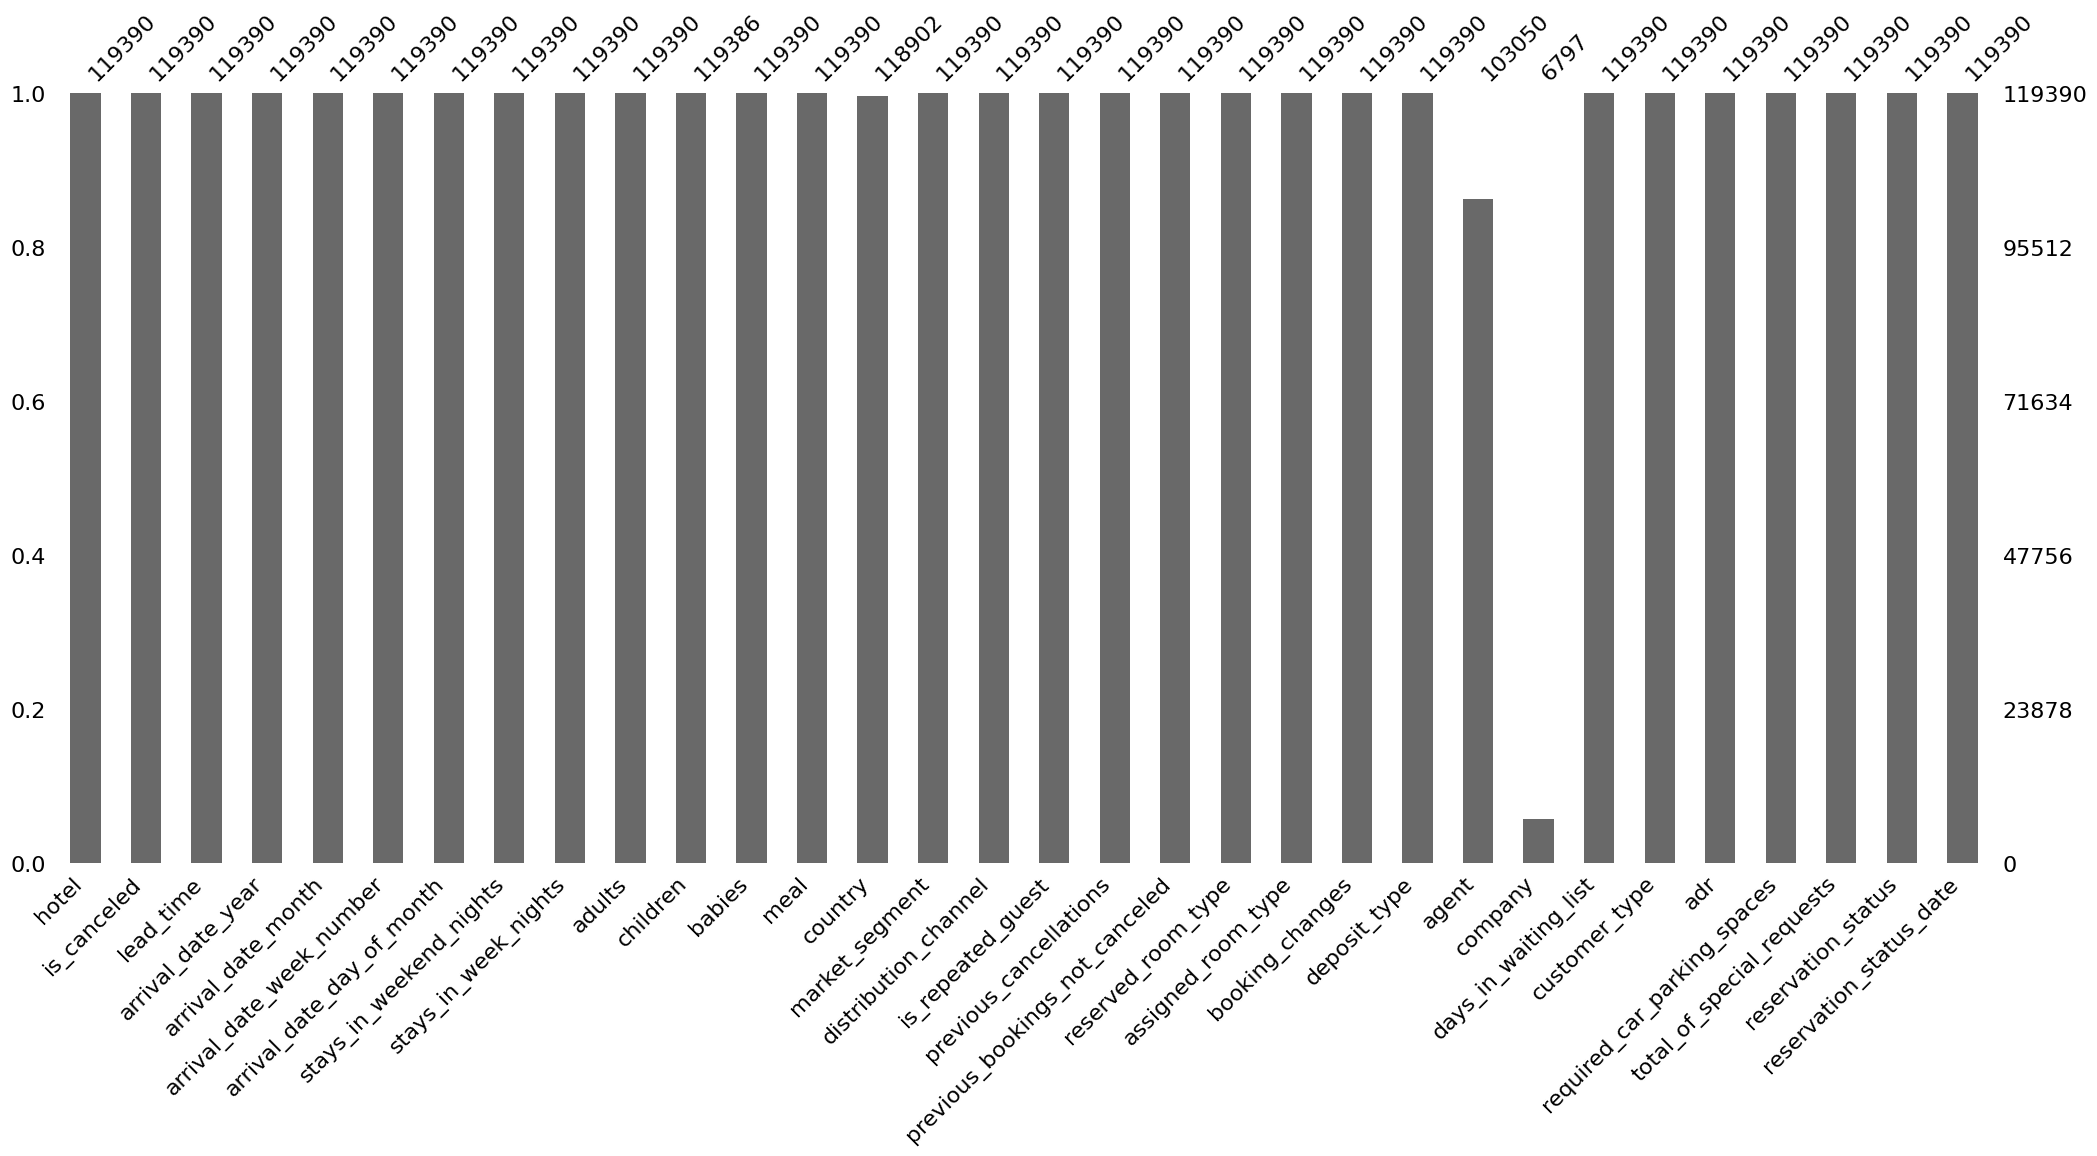

In [254]:
msno.bar(hotel_bookings_df)

**Missing Values**

The dataset contains missing values in four columns:

- **children:** 4 missing values
- **country:** 488 missing values
- **agent:** 16,340 missing values
- **company:** 112,593 missing values

These missing values might need addressing.

### Check Duplicate Values

In [255]:
# Duplicate analysis
dup_mask = hotel_bookings_df.duplicated()
dup_mask_all = hotel_bookings_df.duplicated(keep = False)  # marks all members of duplicate groups

duplicate_count = dup_mask.sum()
duplicate_pct = round(duplicate_count / len(hotel_bookings_df) * 100, 2)

# How many distinct row signatures are duplicated (groups)
duplicate_groups = (
    hotel_bookings_df[dup_mask_all]
    .value_counts()
    .reset_index(name = "group_size")
)
n_duplicate_groups = (duplicate_groups["group_size"] > 1).sum()

summary = pd.DataFrame({
    "total_rows": [len(hotel_bookings_df)],
    "duplicate_rows": [duplicate_count],
    "duplicate_pct": [duplicate_pct],
    "duplicate_groups": [n_duplicate_groups],
    "avg_group_size": [round(duplicate_groups["group_size"].mean(), 2) if not duplicate_groups.empty else 0]
})

print("Duplicate Summary")
display(summary)

Duplicate Summary


,total_rows,duplicate_rows,duplicate_pct,duplicate_groups,avg_group_size
0,119390,31994,26.8,17,2.65


In [256]:
print("Top 10 duplicate row patterns (exact full-row duplicates):")
display(duplicate_groups.sort_values("group_size", ascending = False).head(10))

Top 10 duplicate row patterns (exact full-row duplicates):


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,group_size
0,City Hotel,0,256,2016,October,43,16,2,3,2,...,9.0,333.0,0,Transient-Party,100.75,0,0,Check-Out,2016-10-21,7
1,Resort Hotel,0,24,2015,November,45,3,3,10,1,...,334.0,281.0,0,Transient-Party,40.00,0,0,Check-Out,2015-11-16,5
2,Resort Hotel,0,36,2015,November,45,7,2,6,1,...,185.0,281.0,0,Transient-Party,36.00,0,0,Check-Out,2015-11-15,4
3,Resort Hotel,0,36,2015,November,45,7,2,6,1,...,185.0,281.0,0,Transient-Party,36.00,0,0,Check-Out,2015-11-15,3
10,Resort Hotel,0,31,2015,November,45,2,5,10,1,...,185.0,281.0,0,Transient-Party,52.20,0,0,Check-Out,2015-11-17,2
15,City Hotel,0,256,2016,October,43,16,2,3,2,...,9.0,333.0,0,Transient-Party,100.75,0,0,Check-Out,2016-10-21,2
14,Resort Hotel,0,5,2017,January,1,2,1,3,1,...,314.0,29.0,0,Transient-Party,40.40,1,1,Check-Out,2017-01-06,2
13,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,326.0,281.0,0,Transient,48.00,0,0,Check-Out,2015-11-16,2
12,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,185.0,281.0,0,Transient-Party,52.20,0,0,Check-Out,2015-11-17,2
11,Resort Hotel,0,27,2015,November,45,6,2,7,1,...,334.0,281.0,0,Transient-Party,40.00,0,0,Check-Out,2015-11-15,2


There are 31994 (26%) duplicate rows in the data. 

We don't have booking_id or any customer info to check whether these are legitimate duplicate values or just exactly the same bookings by different users. More domain knowledge or data is necessary to conclude if they're legit duplicate values.

Duplicate values may cause several problems, the main one being overfitting, since there is no way to tell if the entries are really duplicates or not, so for the time being the decision is to drop duplicate values.

In [257]:
hotel_bookings_df = hotel_bookings_df.drop_duplicates().reset_index(drop = True)
print(f"New dataset shape (after dropping duplicates): {hotel_bookings_df.shape}")

New dataset shape (after dropping duplicates): (87396, 32)


### Summary Statistics

In [258]:
hotel_bookings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


**`adr` (Average Daily Rate)** minimum is -6.38 and maximum is 5400.
 - The negative value might indicate entry errors or a special case, needs further investigation.  
 - The maximum is **5400**, which is an extreme outlier compared to the mean (106). Suggests possible data entry error.  
 
**`adults`** minimum is 0 and maximum is 55.
 - This implyies that there was(were) booking(s) without adults, these may be entry errors too.
 - Also 55 adults in one room is nonsensical.
 
**`childern`** and **`babies`** maximum value is 10.
 - This seems very high, a possible data entry error or an outlier, needs further investigation.

- **`stays_in_week_nights`**  
  - Maximum value is **50 nights**, which is unusually high for a hotel booking. Likely an outlier or error.  

- **`previous_cancellations`**  
  - Maximum value = **26**.  
  - It’s improbable for the same guest to have canceled that many times. Likely a data entry or encoding issue.  

- **`previous_bookings_not_canceled`**  
  - Maximum value = **72**.  
  - Again, extremely high and inconsistent with typical customer behavior. Could be incorrect or an outlier.  

- **`days_in_waiting_list`**  
  - Maximum value = **391 days** (over a year).  
  - Very unusual and may indicate incorrect data entry or a rare special case.  

- **`adr` (Average Daily Rate)**  
  - Already noted the **negative minimum (-6.38)**, 


In [259]:
hotel_bookings_df.describe(include = 'object').T

,count,unique,top,freq
hotel,87396,2,City Hotel,53428
arrival_date_month,87396,12,August,11257
meal,87396,5,BB,67978
country,86944,177,PRT,27453
market_segment,87396,8,Online TA,51618
distribution_channel,87396,5,TA/TO,69141
reserved_room_type,87396,10,A,56552
assigned_room_type,87396,12,A,46313
deposit_type,87396,3,No Deposit,86251
customer_type,87396,4,Transient,71986


# Data Pre-processing

Before we move on to Exploratory Data Analysis, it is a good step to do data preprocessing, as that our EDA will be more informative with good features.

## Feature Selection and Engineering

**This step will involve the following**:
 
 - **Removing Directly Related Features**: 
     * We remove features that are directly related to the target variable to prevent data leakage and ensure a fair evaluation of the model.

 - **Dropping Irrelevant Features**: 
     * We drop irrelevant features that do not provide any useful information for predicting the target variable.

 - **Engineering and Dropping High-Cardinality Features**: 
     * We engineer some high-cardinality features to extract relevant information and then drop all high-cardinality features, including the ones from which we extracted information.  

These will reduce the dimensionality of the dataset, preventing data leakage, and creating new features that may provide additional information for the model.

### Remove Directly Related Features

|variable                        |class       |description                                                                                      |
|:-------------------------------|:-----------|:------------------------------------------------------------------------------------------------|
|reservation_status              |categorical |The last status of the reservation: Canceled / Check-Out / No-Show                               |

**reservation_status** is a categorical feature that describes the last status of the reservation: 'Canceled' / 'Check-Out' / 'No-Show'. This feature is directly related to the target variable **is_canceled** for the following reasons:

 - If the reservation_status is 'Canceled', it implies that is_canceled should be 1.
 - Similarly, if the reservation_status is 'Check-Out', it implies that the booking was not canceled, and hence is_canceled should be 0.

The **reservation_status** variable **directly** gives us the value of the target variable, leading to data leakage if it is used as a feature in the model. So, it is important to remove this feature to build a model that can actually predict cancellations.

It is clear from the plot that all the bookings with a reservation_status of "Canceled" or "No-Show" are indeed canceled (is_canceled= 1), and all the bookings with a reservation_status of "Check-Out" are not canceled (is_canceled = 0).

This confirms that the **reservation_status** feature is **directly** related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.

In [260]:
df_status = hotel_bookings_df.copy()

# Handle naming inconsistency (is_canceled vs is_cancelled)
target_col = 'is_canceled'

# Summary table
status_summary = (
    df_status
    .groupby('reservation_status')[target_col]
    .agg(
        bookings = 'count',
        cancellations = 'sum',
        cancel_rate_pct = lambda s: round(s.mean()*100, 2)
    )
    .assign(not_canceled = lambda d: d['bookings'] - d['cancellations'])
    .sort_values('bookings', ascending = False)
)

display(status_summary)

,bookings,cancellations,cancel_rate_pct,not_canceled
reservation_status,,,,
Check-Out,63371,0,0.0,63371
Canceled,23011,23011,100.0,0
No-Show,1014,1014,100.0,0


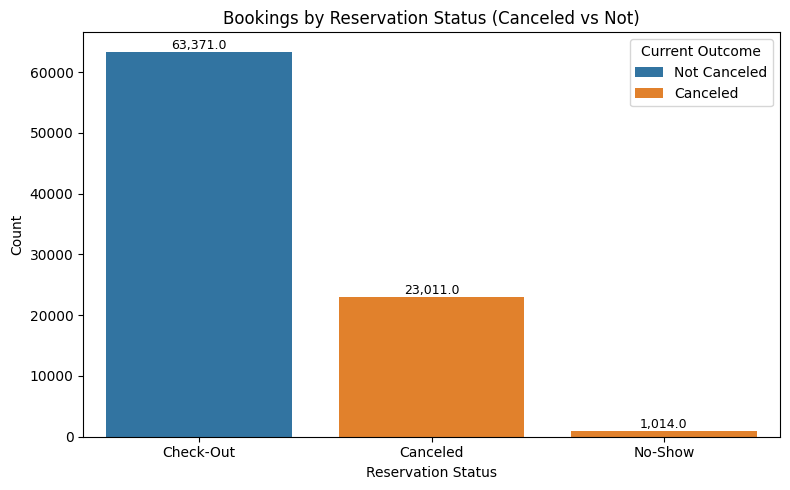

In [261]:
# Stacked count plot (absolute counts)
plot_df = (
    df_status
    .assign(canceled_label = lambda d: d[target_col].map({0: 'Not Canceled', 1: 'Canceled'}))
)

plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data = plot_df,
    x = 'reservation_status',
    hue = 'canceled_label',
    order = status_summary.index
)

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:,}',
                    (p.get_x() + p.get_width()/2, height),
                    ha = 'center', va = 'bottom', fontsize = 9)

plt.title('Bookings by Reservation Status (Canceled vs Not)')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title = 'Current Outcome')
plt.tight_layout()
plt.show()

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_32955/62893121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  rate_ax = sns.barplot(


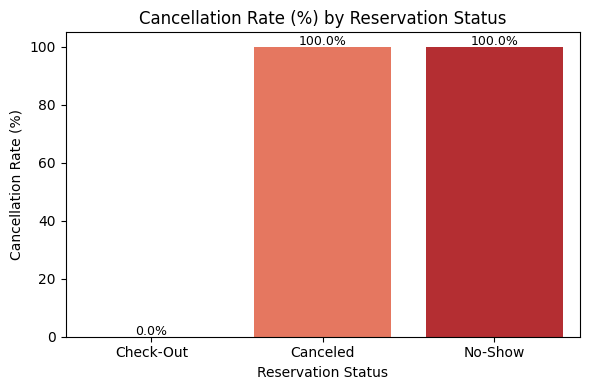

In [262]:
# Cancellation rate bar (percentage)
plt.figure(figsize = (6, 4))
rate_ax = sns.barplot(
    x = status_summary.index,
    y = status_summary['cancel_rate_pct'],
    palette = 'Reds'
)
for i, v in enumerate(status_summary['cancel_rate_pct']):
    rate_ax.text(i, v + 0.5, f'{v}%', ha = 'center', fontsize = 9)
plt.title('Cancellation Rate (%) by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

It is clear from the plot that all the bookings with a reservation_status of "Canceled" or "No-Show" are indeed canceled (is_canceled= 1), and all the bookings with a reservation_status of "Check-Out" are not canceled (is_canceled = 0).

This confirms that the **reservation_status** feature is **directly** related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.

In [263]:
df_clean = hotel_bookings_df.copy()

df_clean = df_clean.drop(columns = ['reservation_status'], axis = 1)

|variable                        |class       |description                                                                                      |
|:-------------------------------|:-----------|:------------------------------------------------------------------------------------------------|
|reservation_status_date         |date        |The date at which the last status was set.                                                       |

**reservation_status_date** is a date feature that indicates the latest date at which the reservation_status was updated. This feature is directly related to the target variable is_canceled for the following reasons:

 - If a booking was canceled, the **reservation_status_date** would be the date on which the booking was canceled, which will be earlier than the arrival date, implying that is_canceled should be 1.
 - Similarly, if a booking was not canceled, the **reservation_status_date** would reflect the date of check-out, which would be later than the arrival date implying that is_canceled should be 0.


Therefore, the **reservation_status_date** can indirectly give us information about the value of the target variable, leading to data leakage if it is used as a feature in the model.

In [264]:
df_tmp = hotel_bookings_df.copy()

# Normalize target column name
target_col = 'is_canceled'

# Ensure datetime
df_tmp['reservation_status_date'] = pd.to_datetime(df_tmp['reservation_status_date'], errors = 'coerce')

# Build arrival_date from separate parts
df_tmp['arrival_date'] = pd.to_datetime(
    df_tmp['arrival_date_year'].astype(str) + '-' +
    df_tmp['arrival_date_month'] + '-' +
    df_tmp['arrival_date_day_of_month'].astype(str),
    format = '%Y-%B-%d',
    errors = 'coerce'
)

# Difference in days: positive => status set AFTER arrival (e.g. checkout), negative => BEFORE (early cancellation)
df_tmp['status_vs_arrival_days'] = (df_tmp['reservation_status_date'] - df_tmp['arrival_date']).dt.days

# Bucket for easier interpretation
def bucket(d):
    if pd.isna(d): return 'missing'
    if d < 0: return 'before_arrival (canceled early)'
    if d == 0: return 'on_arrival'
    if 0 < d <= 7: return '0-7 days after (short stay)'
    if 7 < d <= 30: return '8-30 days after'
    return '>30 days after'
df_tmp['status_timing_bucket'] = df_tmp['status_vs_arrival_days'].map(bucket)

# Summary table
timing_summary = (
    df_tmp
    .groupby('status_timing_bucket')[target_col]
    .agg(
        bookings = 'count',
        cancellations = 'sum',
        cancel_rate_pct = lambda s: round(s.mean()*100, 2)
    )
    .assign(not_canceled = lambda d: d['bookings'] - d['cancellations'])
    .sort_values('bookings', ascending = False)
)

print("Reservation status timing vs arrival:")
display(timing_summary)

Reservation status timing vs arrival:


,bookings,cancellations,cancel_rate_pct,not_canceled
status_timing_bucket,,,,
0-7 days after (short stay),59531,0,0.00,59531
before_arrival (canceled early),22250,22250,100.00,0
8-30 days after,3176,0,0.00,3176
on_arrival,2420,1775,73.35,645
>30 days after,19,0,0.00,19


/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_32955/9219472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  rate_ax = sns.barplot(


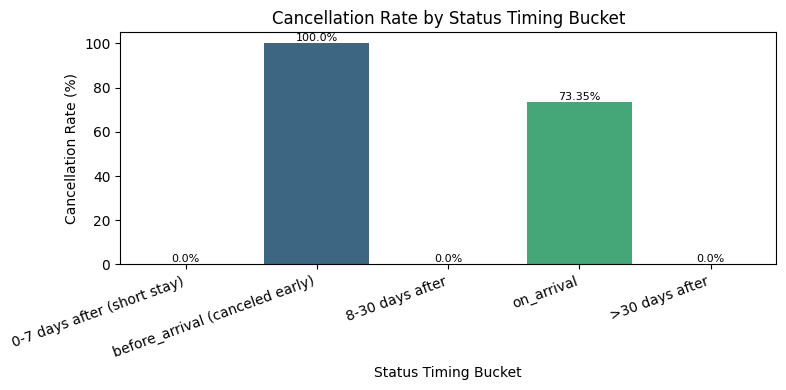

In [265]:
plt.figure(figsize = (8, 4))
rate_ax = sns.barplot(
    x = timing_summary.index,
    y = timing_summary['cancel_rate_pct'],
    palette = 'viridis'
)
for i,v in enumerate(timing_summary['cancel_rate_pct']):
    rate_ax.text(i, v+1, f'{v}%', ha = 'center', fontsize = 8)
plt.title('Cancellation Rate by Status Timing Bucket')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Status Timing Bucket')
plt.xticks(rotation = 20, ha = 'right')
plt.tight_layout()
plt.show()

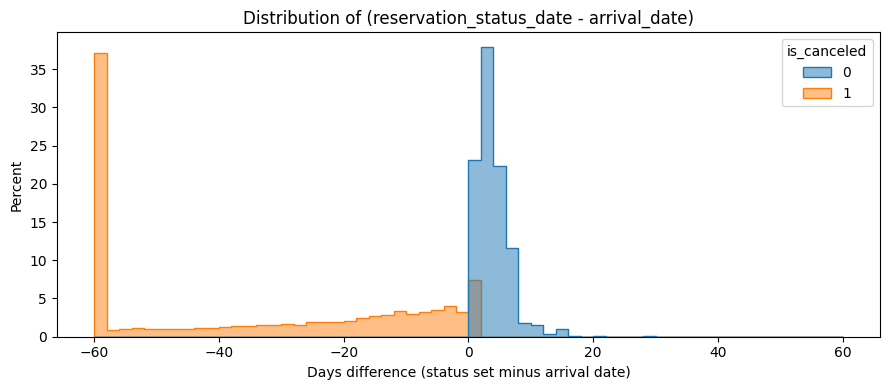

In [266]:
plt.figure(figsize=(9,4))
clipped = df_tmp['status_vs_arrival_days'].clip(-60, 60)
sns.histplot(
    data = df_tmp.assign(clipped_days = clipped),
    x = 'clipped_days',
    hue = target_col,
    bins = 60,
    element = 'step',
    stat = 'percent',
    common_norm = False,
    alpha = 0.5
)

plt.title('Distribution of (reservation_status_date - arrival_date)')
plt.xlabel('Days difference (status set minus arrival date)')
plt.ylabel('Percent')
plt.tight_layout()
plt.show()


The **reservation_status_days_difference** feature represents the number of days between the arrival date and the date at which the reservation status was last updated.

 - Positive values indicate that the reservation status was updated after the arrival date. Since is_canceled is always 0 for these rows, it suggests that these bookings were not canceled and the reservation status was updated (e.g., to 'Check-Out') after the guest arrived.
 - Negative values indicate that the reservation status was updated before the arrival date. Since is_canceled is always 1 for these rows, it suggests that these bookings were canceled before the arrival date.

This shows a clear relationship between the **reservation_status_days_difference** and the **is_canceled** feature. If a booking is canceled, the reservation status is usually updated before the arrival date or if a booking is not canceled, the reservation status is usually updated after the arrival date.

We drop the **reservation_status_date** feature and the newly created **reservation_status_days_difference** to stop data leakage in the model.

In [267]:
df_clean = df_clean.drop(columns = ['reservation_status_date'], axis = 1)

|variable                        |class       |description                                                                                      |
|:-------------------------------|:-----------|:------------------------------------------------------------------------------------------------|
|assigned_room_type              |categorical |The code for type of room assigned                                                               |

The **assigned_room_type** feature represents the type of room assigned to the guest. It may be assigned after the booking is made, so it cannot be used to predict cancellations. Since we lack domain knowledge, we drop this column.

In [268]:
df_clean = df_clean.drop(columns = ['assigned_room_type'], axis = 1)

### Drop Irrelevant Features

Here we drop features that are irrelevant, i.e. don't add anything informative to the model

In [269]:
hotel_bookings_df['arrival_date_year'].value_counts()

arrival_date_year
2016    42391
2017    31692
2015    13313
Name: count, dtype: int64

The **arrival_date_year** feature only includes a few years in the past, and if we want to build a model that generalizes well to future data, we should not to include features that could bias the model towards specific years. Therefore, it is reasonable to drop **arrival_date_year**.

In [270]:
df_clean = df_clean.drop(['arrival_date_year'], axis = 1)

### High Cardinality Features

High cardinality refers to a column that can have many possible values. It increases dimensionality significantly, especially when dealing with categorical variables having a large number of unique categories (high cardinality). This can lead to the “curse of dimensionality”, making the dataset more sparse and potentially affecting the performance of some machine learning algorithms.

In [271]:
high_cardinality_features = ['country', 'agent', 'company']
card_df = hotel_bookings_df.copy()

stats = []
for col in high_cardinality_features:
    vc = card_df[col].value_counts(dropna=True)
    stats.append({
        'feature': col,
        'unique_count': vc.shape[0],
        'unique_pct_of_rows': round(vc.shape[0] / len(card_df) * 100, 2),
        'missing_count': card_df[col].isna().sum(),
        'missing_pct': round(card_df[col].isna().mean() * 100, 2),
        'most_frequent': vc.index[0] if not vc.empty else None,
        'most_freq_count': int(vc.iloc[0]) if not vc.empty else 0,
        'most_freq_pct': round(vc.iloc[0] / len(card_df) * 100, 2) if not vc.empty else 0
    })

high_cardinality_summary = (
    pd.DataFrame(stats)
    .sort_values('unique_count', ascending=False)
)

print("High-cardinality feature summary:")
display(high_cardinality_summary)

High-cardinality feature summary:


,feature,unique_count,unique_pct_of_rows,missing_count,missing_pct,most_frequent,most_freq_count,most_freq_pct
2,company,352,0.40,82137,93.98,40.0,851,0.97
1,agent,333,0.38,12193,13.95,9.0,28759,32.91
0,country,177,0.20,452,0.52,PRT,27453,31.41


* country:
    * **Description**: Country of origin of the guest.
    * **Action**: There are 177 unique countries, this high cardinality will be a problem so we will group the countries by continent. There are 452 (0.52%) missing values in this column, we can drop these columns without losing much information, we can also drop the feature itself if it doesn't bring enough explanatory power, doing a KNNImputer is one possibility, but the decision will need subject matter expertise.
    
* agent:
    * **Description**: ID of the travel agent responsible for the booking.
    * **Action**: There the feature is missing around 14% of the variables, which can be easily fixed by KNNImputer for example, however this feature has many unique categories causing high cardinality features, and some agents may only appear a few times in the dataset, which could cause overfitting. We could create a new feature representing the number of bookings made by each agent to capture the experience of the agent and then drop the original agent feature. However, this new feature may not be very meaningful because the number of bookings made by an agent may not be directly related to the cancellation rate. For now, we will omit this feature.
    
* company:
    * **Description**: ID of the company responsible for the booking.
    * **Action**: This feature has a high percentage of missing values and may not be very informative for predicting cancellations, so it may be better to drop it entirely.

In [272]:
df_clean = df_clean.dropna(subset = 'country', axis = 0)

In [273]:
continent_groups = {
    'Europe': {
        'PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','SWE','EST',
        'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HRV','AND','GIB','SVK',
        'HUN','BIH','BGR','MKD','ISL','MLT','IMN','LIE','MNE','FRO','MCO','CYP','JEY','GGY','MCO'
    },
    'North America': {
        'USA','CAN','MEX','PRI','JAM','CYM','KNA','GLP','BRB','DMA','VGB','ZMB',
        'CRI','CUB','DOM','GTM','HND','LCA','NIC','PAN','SLV','AIA','ABW','BHS'
    },
    'South America': {
        'BRA','CHL','COL','VEN','SUR','ECU','PER','BOL','PRY','GUY','ARG','URY'
    },
    'Asia': {
        'CHN','CN','IND','KOR','HKG','IRN','ARE','GEO','ARM','ISR','PHL','IDN','JPN','KWT','MDV','THA','MYS','LKA',
        'SGP','MMR','UZB','KAZ','SAU','VNM','TJK','PAK','NPL','BGD','QAT','MAC','IRQ','JOR','LAO','LBN','OMN',
        'BHR','AZE','TMP','TWN'
    },
    'Africa': {
        'MOZ','MAR','AGO','ZAF','EGY','NGA','KEN','ZWE','DZA','TUN','CMR','CIV','COM','UGA','GAB','GNB','MRT','DJI',
        'STP','TZA','SDN','LBR','BDI','BEN','BFA','CPV','ETH','GHA','MDG','MLI','MUS','MWI','MYT','NAM','SEN','SLE',
        'SYC','TGO','RWA','LBY'
    },
    'Oceania': {
        'AUS','FJI','NZL','PNG','PLW','NCL','KIR','FSM','SLB','NRU','TUV','TON','WSM','ASM','UMI'
    },
    'Others': {
        'ATA','ATF','UNK'
    }
}

# Build lookup
continent_lookup = {
    code: continent
    for continent, codes in continent_groups.items()
    for code in codes
}

# Apply to df_clean (ensure df_clean exists)
df_clean['continent'] = df_clean['country'].map(continent_lookup).fillna('Others')

In [274]:
df_clean = df_clean.drop(['agent', 'company','country'], axis = 1)

### Handle Missing Values

In [275]:
display(df_clean.isna().sum()[df_clean.isna().sum() > 0])

children    4
dtype: int64

<Axes: xlabel='children', ylabel='Count'>

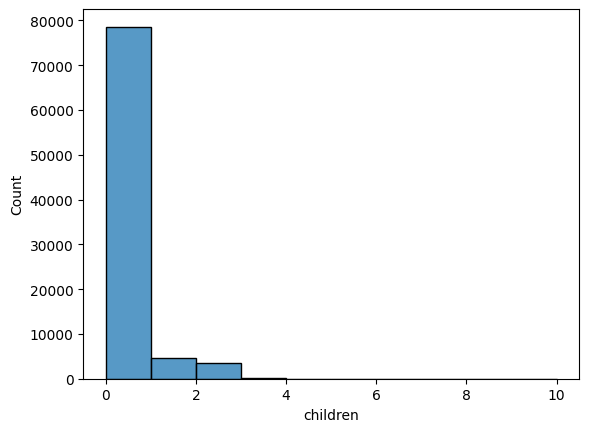

In [276]:
sns.histplot(df_clean['children'],bins=10)

The children feature has 4 missing values and is a numerical feature. Given the distribution of values in the children column, the majority of bookings have 0 children, which is a strong mode. Statistically and also logically it would be reasonable to impute the missing values with 0 (the mode of the column), since if a customer didn't specify how many children they're coming with it's a reasonable assumption that they are coming with none. This approach is simple and will not introduce significant bias.

In [277]:
df_clean['children'] = df_clean['children'].fillna(0)
df_clean['children'].isnull().sum()

np.int64(0)

### Handle Noisy Data

Now let's analyze and handle the noisy data in the adr, adults, children, and babies columns as discussed previously.

In [278]:
noisy_data = {
    'adr_negative': df_clean[df_clean['adr'] < 0],
    'adults_zero': df_clean[df_clean['adults'] == 0],
    'children_ten': df_clean[df_clean['children'] == 10],
    'babies_ten': df_clean[df_clean['babies'] == 10],    
    'adults_high': df_clean[df_clean['adults'] > 10], 
    'stays_in_week_nights_high': df_clean[df_clean['stays_in_week_nights'] > 30],
    'previous_cancellations_high': df_clean[df_clean['previous_cancellations'] > 10],
    'previous_bookings_not_canceled_high': df_clean[df_clean['previous_bookings_not_canceled'] > 20],
    'days_in_waiting_list_high': df_clean[df_clean['days_in_waiting_list'] > 365],
    'adr_high': df_clean[df_clean['adr'] > 1000],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr_negative': 1,
 'adults_zero': 380,
 'children_ten': 1,
 'babies_ten': 1,
 'adults_high': 12,
 'stays_in_week_nights_high': 7,
 'previous_cancellations_high': 39,
 'previous_bookings_not_canceled_high': 125,
 'days_in_waiting_list_high': 8,
 'adr_high': 1}

We have identified some noisy data in the following features:

* **adr**: There is 1 booking with a negative Average Daily Rate (ADR), which doesn't make sense and indicates a potential error or special case. Since there is only one negative value, it would be reasonable to replace it with the median or mean of the adr column, as this will not significantly affect the distribution of the data.
* **adults**: There are 403 bookings with 0 adults, which could be a data entry error unless there are legitimate cases where only children or babies book a room. this unlikely that a booking would be made with 0 adults, so these 403 rows seem to be errors. Given that this is a small proportion of the dataset, it would be reasonable to remove these rows.
* **children**: There is 1 booking with 10 children, which seems unusually high for a single booking and could be a potential outlier or data entry error. Since there is only one booking with 10 children, it could be considered as an outlier and removed from the dataset.
* **babies**: There is 1 booking with 10 babies, which seems unusually high for a single booking and could be a potential outlier or data entry error. since there is only one booking with 10 babies, it could be considered as an outlier and removed from the dataset.

In [279]:
df_clean['adr'] = (
    np.where(
        df_clean['adr'] < 0, 
        df_clean['adr'].median(), 
        df_clean['adr']
)
)

df_clean = df_clean[(df_clean['adults'] != 0) & (df_clean['adults'] <= 6)]
df_clean = df_clean[df_clean['children'] < 10]
df_clean = df_clean[df_clean['babies'] < 10]
df_clean = df_clean[df_clean['stays_in_week_nights'] <= 30]
adr_cap = df_clean['adr'].quantile(0.99)
cancellations_cap = df_clean['previous_cancellations'].quantile(0.99)
bookings_not_canceled_cap = df_clean['previous_bookings_not_canceled'].quantile(0.99)
waiting_list_cap = df_clean['days_in_waiting_list'].quantile(0.99)

df_clean['previous_cancellations'] = (
    np.where(
        df_clean['previous_cancellations'] > cancellations_cap,
        cancellations_cap,
        df_clean['previous_cancellations']
    )
)

df_clean['previous_bookings_not_canceled'] = (
    np.where(
        df_clean['previous_bookings_not_canceled'] > bookings_not_canceled_cap,
        bookings_not_canceled_cap,
        df_clean['previous_bookings_not_canceled']
    )
)

df_clean['days_in_waiting_list'] = (
    np.where(
        df_clean['days_in_waiting_list'] > waiting_list_cap,
        waiting_list_cap,
        df_clean['days_in_waiting_list']
    )
)
df_clean['adr'] = (
    np.where(
        df_clean['adr'] > 1000, 
        adr_cap, 
        df_clean['adr']
    )
)

In [280]:
noisy_data_handled = {
    'adr_negative': df_clean[df_clean['adr'] < 0],
    'adults_zero': df_clean[df_clean['adults'] == 0],
    'children_ten': df_clean[df_clean['children'] == 10],
    'babies_ten': df_clean[df_clean['babies'] == 10],    
    'adults_high': df_clean[df_clean['adults'] > 10], 
    'stays_in_week_nights_high': df_clean[df_clean['stays_in_week_nights'] > 30],
    'previous_cancellations_high': df_clean[df_clean['previous_cancellations'] > 10],
    'previous_bookings_not_canceled_high': df_clean[df_clean['previous_bookings_not_canceled'] > 20],
    'days_in_waiting_list_high': df_clean[df_clean['days_in_waiting_list'] > 365],
    'adr_high': df_clean[df_clean['adr'] > 1000],
}

noisy_data_cleaned_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_cleaned_count

{'adr_negative': 0,
 'adults_zero': 0,
 'children_ten': 0,
 'babies_ten': 0,
 'adults_high': 0,
 'stays_in_week_nights_high': 0,
 'previous_cancellations_high': 0,
 'previous_bookings_not_canceled_high': 0,
 'days_in_waiting_list_high': 0,
 'adr_high': 0}

## Feature Engineering

Here we will do some feature engineering.

We will try to transform the existing columns such that our new features may add some predictive power to the model.

**arrival_date_day_of_month** is an ordinal variable, consisting of up to 31 variables, these may introduce the problem of high cardinality, hence we will try to group these values by the period of month they belong to:
 * Beginning of the Month
 * Middle of the Month
 * End of the Month

In [281]:
conditions = [
    df_clean['arrival_date_day_of_month'] < 11,
    df_clean['arrival_date_day_of_month'] < 21
]

choices = [
    'BoM', #Beginning of Month
    'MoM', #Middle of Month
]

df_clean['arrival_date_day_of_month']  = np.select(conditions, choices, default = 'EoM') #End of Month

We will transform the month date into an ordinal variable later. Other than that there is no feature (text data for example) that can be transformed or grouped such that it will add explanatory power to the model.

Hence, this is all the feature engineering for now.

Before we move onto correlation analysis, it is a good idea to check the distributions of our features and do transformations if neccesarry, as the correlation tests assume that the features are normally distributed.

In [282]:
df_feature_engineered = df_clean.copy()

In [283]:
numeric_features = [
    col for col in df_feature_engineered.columns 
    if pd.api.types.is_numeric_dtype(df_feature_engineered[col]) and col != 'is_canceled'
]

object_features = [
    col for col in df_feature_engineered.columns 
    if pd.api.types.is_object_dtype(df_feature_engineered[col])
]

print("Numeric features:", numeric_features)
print("Object features:", object_features)

Numeric features: ['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Object features: ['hotel', 'arrival_date_month', 'arrival_date_day_of_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'continent']


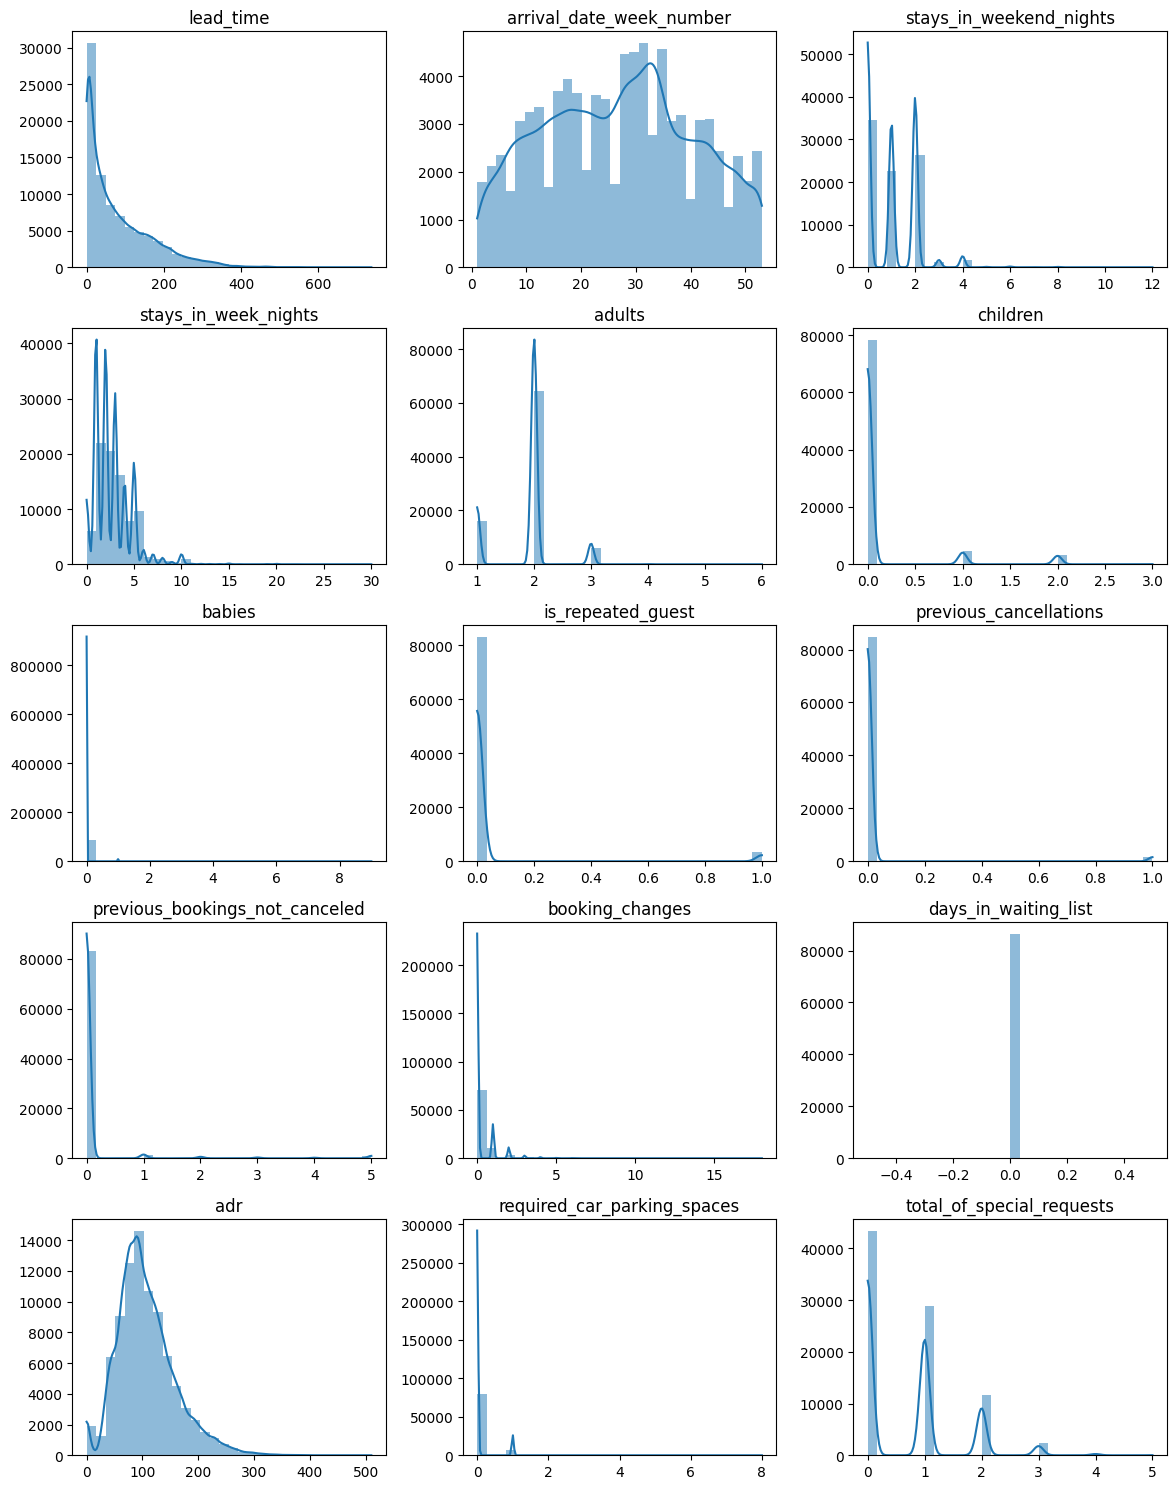

In [284]:
numeric_cols = [
    c for c in df_feature_engineered.columns
    if pd.api.types.is_numeric_dtype(df_feature_engineered[c]) and c != 'is_canceled'
]

# Plot hist + KDE
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.histplot(df_feature_engineered[col], ax=ax, kde=True, bins=30, linewidth=0)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Remove unused axes
for ax in axes[len(numeric_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [285]:
# 1. Right-skewed continuous with log1p
right_skewed = [
    c for c in ['lead_time', 'stays_in_week_nights', 'adr']
    if c in df_feature_engineered.columns
]

for col in right_skewed:
    df_feature_engineered[f'{col}_log'] = np.log1p(df_feature_engineered[col])

# 2. booking_changes: Dual approach (highly zero-inflated ~80%)
if 'booking_changes' in df_feature_engineered.columns:
    # Binary indicator (primary feature for modeling)
    df_feature_engineered['booking_changes_gt0'] = (df_feature_engineered['booking_changes'] > 0).astype(int)
    # Log transformation for when it's non-zero (secondary/optional)
    df_feature_engineered['booking_changes_log'] = np.log1p(df_feature_engineered['booking_changes'])

# 3. Zero-inflated count features -> binary flags
zero_inflated = [
    c for c in [
        'children', 'babies', 'days_in_waiting_list',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'required_car_parking_spaces'
    ] if c in df_feature_engineered.columns
]

for col in zero_inflated:
    df_feature_engineered[f'{col}_gt0'] = (df_feature_engineered[col] > 0).astype(int)

# 4. Small-range numeric as ordinal categorical with binning
# Binning reduces cardinality and handles outliers

# adults: 1, 2, 3+ (most bookings are 2 adults)
if 'adults' in df_feature_engineered.columns:
    df_feature_engineered['adults_cat'] = pd.cut(
        df_feature_engineered['adults'],
        bins = [0, 1, 2, np.inf],
        labels = ['1', '2', '3+'],
        right=True,
        include_lowest=True
    ).astype('category')

# total_of_special_requests: 0, 1, 2+
if 'total_of_special_requests' in df_feature_engineered.columns:
    df_feature_engineered['total_of_special_requests_cat'] = pd.cut(
        df_feature_engineered['total_of_special_requests'],
        bins=[-0.1, 0, 1, np.inf],
        labels=['0', '1', '2+'],
        right=True
    ).astype('category')

# stays_in_weekend_nights: 0, 1, 2, 3+
if 'stays_in_weekend_nights' in df_feature_engineered.columns:
    df_feature_engineered['stays_in_weekend_nights_cat'] = pd.cut(
        df_feature_engineered['stays_in_weekend_nights'],
        bins=[-0.1, 0, 1, 2, np.inf],
        labels=['0', '1', '2', '3+'],
        right=True
    ).astype('category')

# 5. Cyclical encoding for seasonality (week of year)
if 'arrival_date_week_number' in df_feature_engineered.columns:
    max_week = 53
    w = df_feature_engineered['arrival_date_week_number'].fillna(0)
    df_feature_engineered['arrival_week_sin'] = np.sin(2 * np.pi * w / max_week)
    df_feature_engineered['arrival_week_cos'] = np.cos(2 * np.pi * w / max_week)

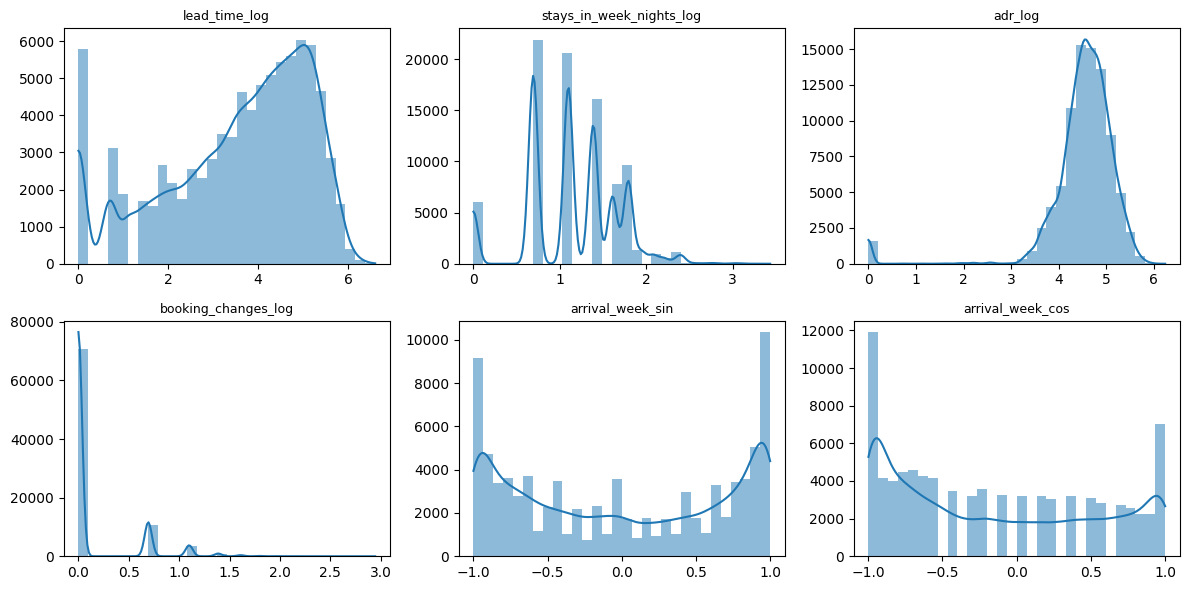

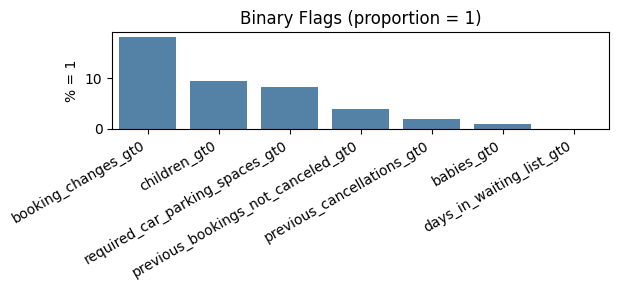

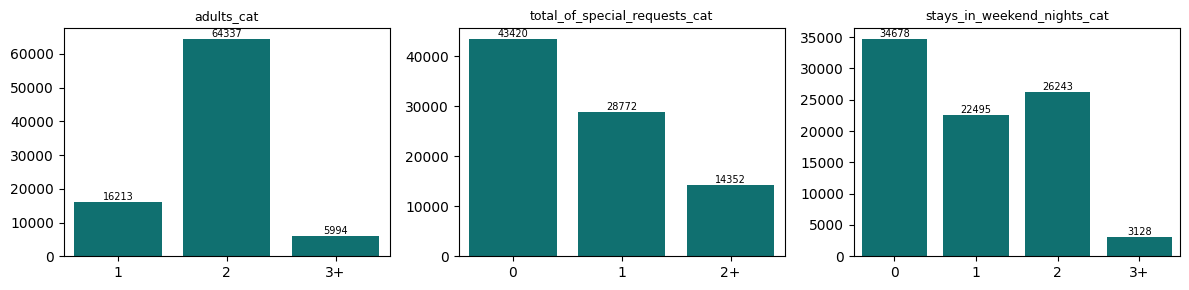

In [294]:
# --- Distribution check for NEW derived / engineered features ---

# Identify derived feature groups
log_feats      = [c for c in df_feature_engineered.columns if c.endswith('_log')]
boxcox_feats   = [c for c in df_feature_engineered.columns if c.endswith('_boxcox')]
flag_feats     = [c for c in df_feature_engineered.columns if c.endswith('_gt0')]
ordinal_feats  = [c for c in df_feature_engineered.columns if c.endswith('_cat')]
cyc_feats      = [c for c in ['arrival_week_sin','arrival_week_cos'] if c in df_feature_engineered.columns]

derived_numeric = [
    c for c in log_feats + boxcox_feats + cyc_feats
    if pd.api.types.is_numeric_dtype(df_feature_engineered[c])
]

# Plots for continuous derived features (hist + KDE)
if derived_numeric:
    n_cols = 3
    n_rows = int(np.ceil(len(derived_numeric) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axes = axes.flatten()
    for ax, col in zip(axes, derived_numeric):
        sns.histplot(df_feature_engineered[col], ax=ax, kde=True, bins=30, linewidth=0)
        ax.set_title(col, fontsize=9)
        ax.set_xlabel("")
        ax.set_ylabel("")
    for ax in axes[len(derived_numeric):]:
        ax.remove()
    plt.tight_layout()
    plt.show()

# Binary flag feature distribution
if flag_feats:
    flag_summary = []
    for col in flag_feats:
        s = df_feature_engineered[col]
        flag_summary.append({
            'feature': col,
            'pct_gt0': round(s.mean()*100,2),
            'count_1': int(s.sum()),
            'count_0': int((1-s).sum())
        })
    flag_df = pd.DataFrame(flag_summary).sort_values('pct_gt0', ascending=False)

    plt.figure(figsize=(max(5, len(flag_feats)*0.9),3))
    sns.barplot(
        data = flag_df,
        x = 'feature',
        y = 'pct_gt0',
        color = 'steelblue'
    )
    plt.ylabel('% = 1')
    plt.xlabel('')
    plt.xticks(rotation=30, ha='right')
    plt.title('Binary Flags (proportion = 1)')
    plt.tight_layout()
    plt.show()

# 5. Ordinal / small-range categorical distributions
if ordinal_feats:
    n_cols = 3
    n_rows = int(np.ceil(len(ordinal_feats) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axes = axes.flatten()
    for ax, col in zip(axes, ordinal_feats):
        vc = df_feature_engineered[col].value_counts().sort_index()
        sns.barplot(x=vc.index.astype(str), y=vc.values, ax=ax, color='teal')
        ax.set_title(col, fontsize=9)
        ax.set_xlabel("")
        ax.set_ylabel("")
        for xi, val in enumerate(vc.values):
            ax.text(xi, val, val, ha='center', va='bottom', fontsize=7)
    for ax in axes[len(ordinal_feats):]:
        ax.remove()
    plt.tight_layout()
    plt.show()

In [295]:
df_clean

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,continent
0,Resort Hotel,0,342,July,27,BoM,0,0,2,0.0,...,0.0,C,3,No Deposit,0.0,Transient,0.00,0,0,Europe
1,Resort Hotel,0,737,July,27,BoM,0,0,2,0.0,...,0.0,C,4,No Deposit,0.0,Transient,0.00,0,0,Europe
2,Resort Hotel,0,7,July,27,BoM,0,1,1,0.0,...,0.0,A,0,No Deposit,0.0,Transient,75.00,0,0,Europe
3,Resort Hotel,0,13,July,27,BoM,0,1,1,0.0,...,0.0,A,0,No Deposit,0.0,Transient,75.00,0,0,Europe
4,Resort Hotel,0,14,July,27,BoM,0,2,2,0.0,...,0.0,A,0,No Deposit,0.0,Transient,98.00,0,1,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,August,35,EoM,2,5,2,0.0,...,0.0,A,0,No Deposit,0.0,Transient,96.14,0,0,Europe
87392,City Hotel,0,102,August,35,EoM,2,5,3,0.0,...,0.0,E,0,No Deposit,0.0,Transient,225.43,0,2,Europe
87393,City Hotel,0,34,August,35,EoM,2,5,2,0.0,...,0.0,D,0,No Deposit,0.0,Transient,157.71,0,4,Europe
87394,City Hotel,0,109,August,35,EoM,2,5,2,0.0,...,0.0,A,0,No Deposit,0.0,Transient,104.40,0,0,Europe


## Correlation Analysis

Here we will utilse Filter methods to select features based on characteristics in the data. Filter methods look at each feature individually, or compare them to other features, and assess how important they are.

Feature Selection is important for several reasons:
 - Easier to interpret
 - Less redundant (have reduced feature redundancy)
 - Faster to train
 - Easier to deploy to production

We will use Chi-square test and ANOVA tests to see how important each feature is. Chi-square is used when we have categorical variables and a categorical target and ANOVA is used when we have continuous variables and a categorical target.

One crucial assumption of these methods is that the numeric features are normally distributed.

In [296]:
# 1. Identify derived categorical features (suffix _cat) + transformed arrival_date_day_of_month
derived_cat_cols = [c for c in df_feature_engineered.columns if c.endswith('_cat')]
if 'arrival_date_day_of_month' in df_feature_engineered.columns:
    # Already converted to BoM/MoM/EoM earlier; ensure treated as object
    derived_cat_cols.append('arrival_date_day_of_month')

# Cast them explicitly to object (if category -> object)
for c in derived_cat_cols:
    if c in df_feature_engineered.columns:
        df_feature_engineered[c] = df_feature_engineered[c].astype('object')

# 2. Identify derived numeric features (log / boxcox / cyclical / optional binary flags)
log_feats    = [c for c in df_feature_engineered.columns if c.endswith('_log')]
cyc_feats    = [c for c in ['arrival_week_sin', 'arrival_week_cos'] if c in df_feature_engineered.columns]
flag_feats   = [c for c in df_feature_engineered.columns if c.endswith('_gt0')]  # keep if you want binary derived indicators

# Choose which groups to include as "numeric_features"
# If you prefer to EXCLUDE the binary flags from numeric features, remove flag_feats from this list.
derived_numeric_feats = log_feats + cyc_feats + flag_feats

# Filter to those that are truly numeric dtypes (safety)
numeric_features = [
    c for c in derived_numeric_feats
    if c in df_feature_engineered.columns and pd.api.types.is_numeric_dtype(df_feature_engineered[c]) and c != 'is_canceled'
]

# 3. Object (categorical) features: all object dtypes (including derived_cat_cols) excluding target
object_features = [
    c for c in df_feature_engineered.columns
    if c != 'is_canceled' and pd.api.types.is_object_dtype(df_feature_engineered[c])
]

# 4. (Optional) Sanity print
print("Derived numeric features (used):", numeric_features)
print("Categorical (object) features:", object_features)
print("Derived categorical treated as object:", derived_cat_cols)

Derived numeric features (used): ['lead_time_log', 'stays_in_week_nights_log', 'adr_log', 'booking_changes_log', 'arrival_week_sin', 'arrival_week_cos', 'booking_changes_gt0', 'children_gt0', 'babies_gt0', 'days_in_waiting_list_gt0', 'previous_cancellations_gt0', 'previous_bookings_not_canceled_gt0', 'required_car_parking_spaces_gt0']
Categorical (object) features: ['hotel', 'arrival_date_month', 'arrival_date_day_of_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'continent', 'adults_cat', 'total_of_special_requests_cat', 'stays_in_weekend_nights_cat']
Derived categorical treated as object: ['adults_cat', 'total_of_special_requests_cat', 'stays_in_weekend_nights_cat', 'arrival_date_day_of_month']


In [297]:
from sklearn.feature_selection import chi2,mutual_info_classif
import jinja2

In [304]:
df_encoded = pd.get_dummies(df_feature_engineered[object_features], drop_first = True)
target = df_feature_engineered['is_canceled']

best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(df_encoded, target)

feature_scores = pd.DataFrame(data={'Feature': df_encoded.columns, 'Chi-Squared Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Chi-Squared Score', ascending=False)
feature_scores.style.background_gradient()

,Feature,Chi-Squared Score
37,deposit_type_Non Refund,2336.596153
23,market_segment_Online TA,1572.636770
22,market_segment_Offline TA/TO,1131.859363
25,distribution_channel_Direct,1036.647454
20,market_segment_Direct,956.997610
41,customer_type_Transient-Party,894.141730
19,market_segment_Corporate,466.927803
27,distribution_channel_TA/TO,402.524291
50,total_of_special_requests_cat_1,378.105541
51,total_of_special_requests_cat_2+,377.742329


In [305]:
feature_scores[feature_scores['Chi-Squared Score'] > 50]

,Feature,Chi-Squared Score
37,deposit_type_Non Refund,2336.596153
23,market_segment_Online TA,1572.636770
22,market_segment_Offline TA/TO,1131.859363
25,distribution_channel_Direct,1036.647454
20,market_segment_Direct,956.997610
41,customer_type_Transient-Party,894.141730
19,market_segment_Corporate,466.927803
27,distribution_channel_TA/TO,402.524291
50,total_of_special_requests_cat_1,378.105541
51,total_of_special_requests_cat_2+,377.742329


/opt/miniconda3/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/miniconda3/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


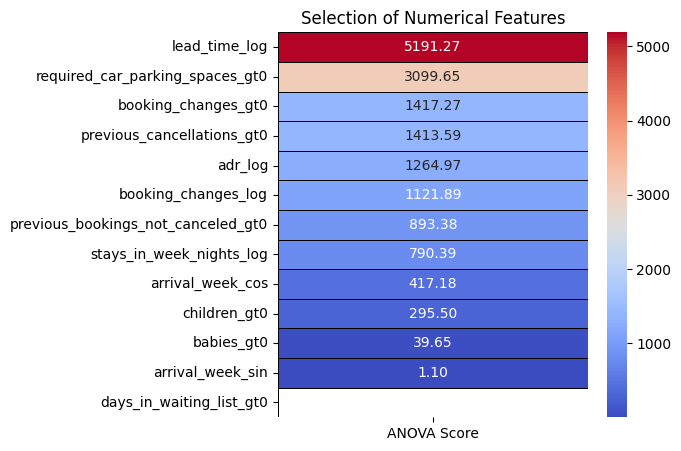

In [300]:
from sklearn.feature_selection import f_classif
features = df_feature_engineered.loc[:,numeric_features]
target = df_feature_engineered.loc[:,'is_canceled']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

## Exploratory Data Analysis

In [308]:
df_feature_engineered.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,babies_gt0,days_in_waiting_list_gt0,previous_cancellations_gt0,previous_bookings_not_canceled_gt0,required_car_parking_spaces_gt0,adults_cat,total_of_special_requests_cat,stays_in_weekend_nights_cat,arrival_week_sin,arrival_week_cos
0,Resort Hotel,0,342,July,27,BoM,0,0,2,0.0,...,0,0,0,0,0,2,0,0,-0.059241,-0.998244
1,Resort Hotel,0,737,July,27,BoM,0,0,2,0.0,...,0,0,0,0,0,2,0,0,-0.059241,-0.998244
2,Resort Hotel,0,7,July,27,BoM,0,1,1,0.0,...,0,0,0,0,0,1,0,0,-0.059241,-0.998244
3,Resort Hotel,0,13,July,27,BoM,0,1,1,0.0,...,0,0,0,0,0,1,0,0,-0.059241,-0.998244
4,Resort Hotel,0,14,July,27,BoM,0,2,2,0.0,...,0,0,0,0,0,2,1,0,-0.059241,-0.998244


In [309]:
df_feature_engineered.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86544.0,0.275975,0.447007,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,86544.0,80.116600,86.000330,0.000000,12.000000,50.000000,125.000000,737.000000
arrival_date_week_number,86544.0,26.837909,13.645725,1.000000,16.000000,27.000000,37.000000,53.000000
stays_in_weekend_nights,86544.0,1.005870,1.019409,0.000000,0.000000,1.000000,2.000000,12.000000
stays_in_week_nights,86544.0,2.625139,2.015249,0.000000,1.000000,2.000000,4.000000,30.000000
adults,86544.0,1.882696,0.495256,1.000000,2.000000,2.000000,2.000000,6.000000
children,86544.0,0.134590,0.446304,0.000000,0.000000,0.000000,0.000000,3.000000
babies,86544.0,0.010734,0.108512,0.000000,0.000000,0.000000,0.000000,9.000000
is_repeated_guest,86544.0,0.038801,0.193122,0.000000,0.000000,0.000000,0.000000,1.000000
previous_cancellations,86544.0,0.019089,0.136837,0.000000,0.000000,0.000000,0.000000,1.000000


In [310]:
df_feature_engineered.describe(include = 'object').T

,count,unique,top,freq
hotel,86544,2,City Hotel,53050
arrival_date_month,86544,12,August,11189
arrival_date_day_of_month,86544,3,EoM,29733
meal,86544,5,BB,67267
market_segment,86544,8,Online TA,51292
distribution_channel,86544,5,TA/TO,68720
reserved_room_type,86544,9,A,56049
deposit_type,86544,3,No Deposit,85400
customer_type,86544,4,Transient,71312
continent,86544,7,Europe,76678


In [311]:
df_feature_engineered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86544 entries, 0 to 87395
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   hotel                               86544 non-null  object 
 1   is_canceled                         86544 non-null  int64  
 2   lead_time                           86544 non-null  int64  
 3   arrival_date_month                  86544 non-null  object 
 4   arrival_date_week_number            86544 non-null  int64  
 5   arrival_date_day_of_month           86544 non-null  object 
 6   stays_in_weekend_nights             86544 non-null  int64  
 7   stays_in_week_nights                86544 non-null  int64  
 8   adults                              86544 non-null  int64  
 9   children                            86544 non-null  float64
 10  babies                              86544 non-null  int64  
 11  meal                                86544 non-

In [312]:
## PLOTS

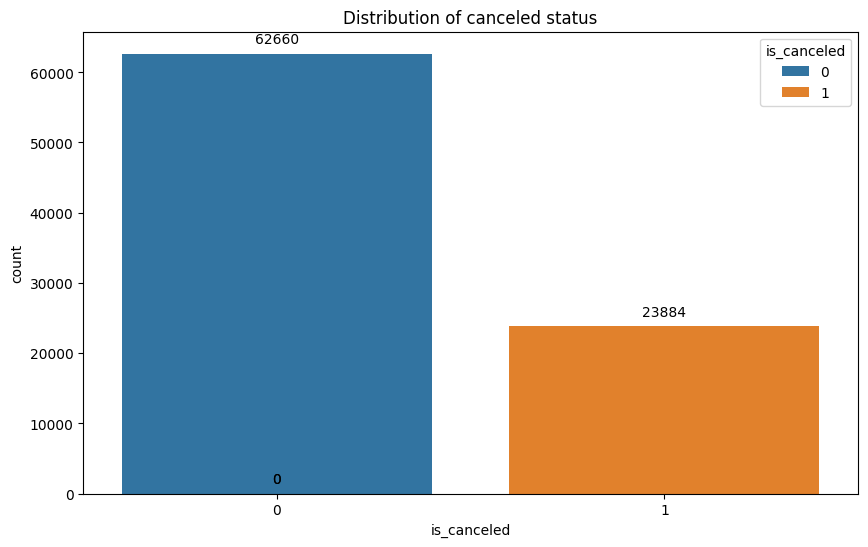

In [315]:
plt.figure(figsize=(10, 6))
ax = (
    sns.countplot(
        data = df_feature_engineered,
        x = 'is_canceled',
        hue = 'is_canceled'
    )
)
for i in ax.patches:
    height = int(i.get_height())
    ax.annotate(f'{height}', (i.get_x() + i.get_width() / 2, height),
                ha = 'center', va = 'center', xytext = (0, 10),
                textcoords = 'offset points',
               )
plt.title('Distribution of canceled status')
plt.show()

In [316]:
df_feature_engineered['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.724025
1    0.275975
Name: proportion, dtype: float64

Approximately 28% of the bookings were canceled, and 72% were not canceled. This indicates that there is some imbalance in the target variable, but not that high. Generally, a dataset is considered highly imbalanced if one class represents over 80-90% of the data. In this case, the minority class (canceled) is still well-represented, so it may not be necessary to apply any resampling or synthetic oversampling techniques (e.g., oversampling, undersampling, SMOTE) to balance the classes.

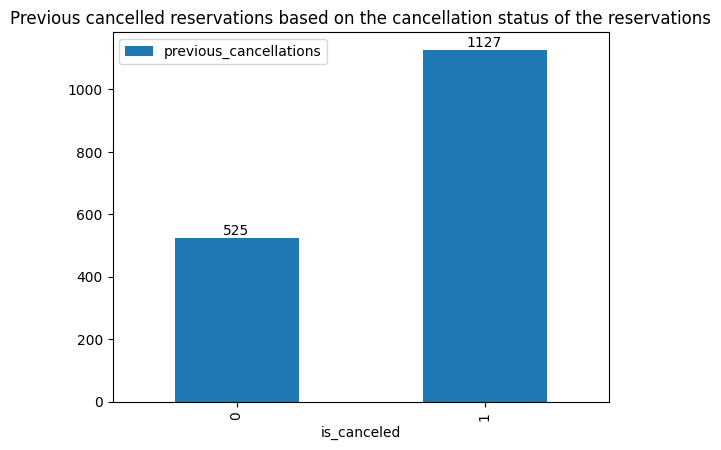

In [317]:
ax = (df_feature_engineered
      .groupby("is_canceled")
      .agg({"previous_cancellations":'sum'})
      .plot
      .bar())
ax.bar_label(ax.containers[0])
plt.title('Previous cancelled reservations based on the cancellation status of the reservations');

It is more often that a client has canceled a booking, if they had canceled a booking in the past.

This could be an important feature for our model.

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_32955/3088274265.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


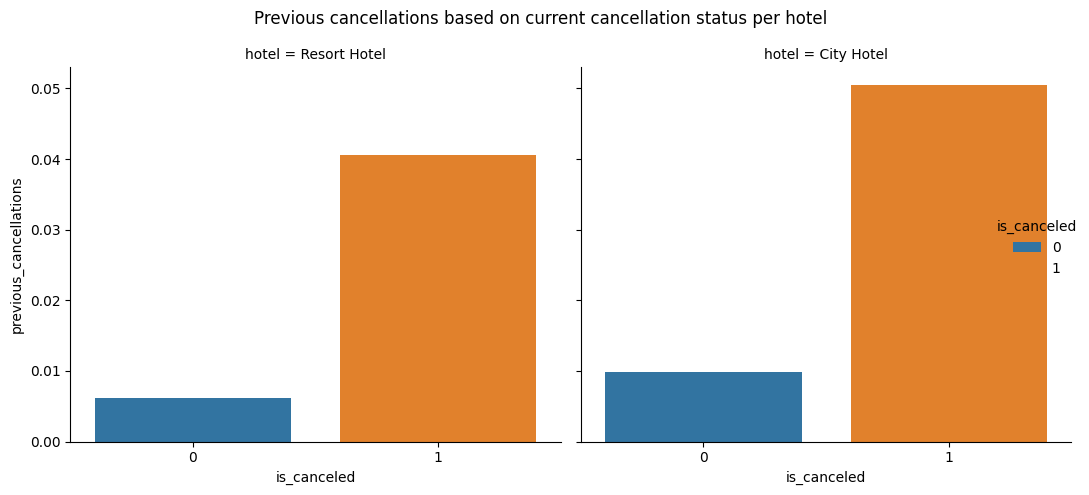

In [319]:
sns.catplot(
    data = df_feature_engineered, 
    x = "is_canceled", 
    y = "previous_cancellations",
    hue = "is_canceled",
    col = "hotel",
    kind = "bar", 
    ci = None
)
plt.suptitle('Previous cancellations based on current cancellation status per hotel')
plt.tight_layout();

It looks like more cancellations have happened at Resort Hotel.

/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_32955/3136658606.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


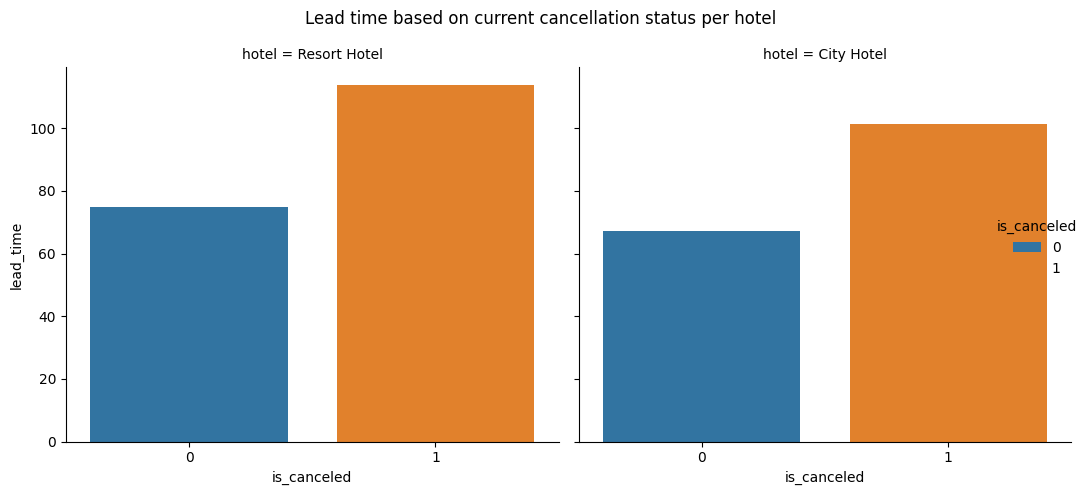

In [320]:
sns.catplot(
    data=df_feature_engineered, 
    x = "is_canceled", 
    y = "lead_time",
    hue = "is_canceled",
    col = "hotel",
    kind = "bar", 
    ci = None
)
plt.suptitle('Lead time based on current cancellation status per hotel')
plt.tight_layout();

In [321]:
import math

In [ ]:
def canceled_countplot(df):

    sns.set_theme(style = 'whitegrid')  

    n_cols = 3 
    num_features = len(df.columns)
    n_rows = math.ceil(num_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize = (20, 5*n_rows))
    plt.subplots_adjust(wspace = 0.8, hspace = 0.5 , bottom = 0.30)

    for i, columns in enumerate(df.columns):
        row = i // n_cols
        col = i % n_cols

        sns.countplot(data = df, 
                      x = df[columns].astype(str), 
                      hue = df['is_canceled'].astype(str),  
                      ax = axes[row, col]
                     )
        axes[row, col].set_title(f'Distribution of Canceled Reservations by {columns}')
        axes[row, col].set_xlabel(columns)
        axes[row, col].set_ylabel('Number of Reservations')
        axes[row, col].legend(title = 'Canceled')

    fig.tight_layout(pad=2.0)
    plt.show()

Plotting columns: ['hotel', 'adults', 'children', 'babies', 'meal', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'adults_cat', 'total_of_special_requests_cat', 'stays_in_weekend_nights_cat', 'arrival_date_day_of_month', 'booking_changes_gt0', 'children_gt0', 'babies_gt0', 'days_in_waiting_list_gt0', 'previous_cancellations_gt0', 'previous_bookings_not_canceled_gt0', 'required_car_parking_spaces_gt0', 'is_canceled']


/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_32955/3624692163.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[row, col].legend(title='Canceled')


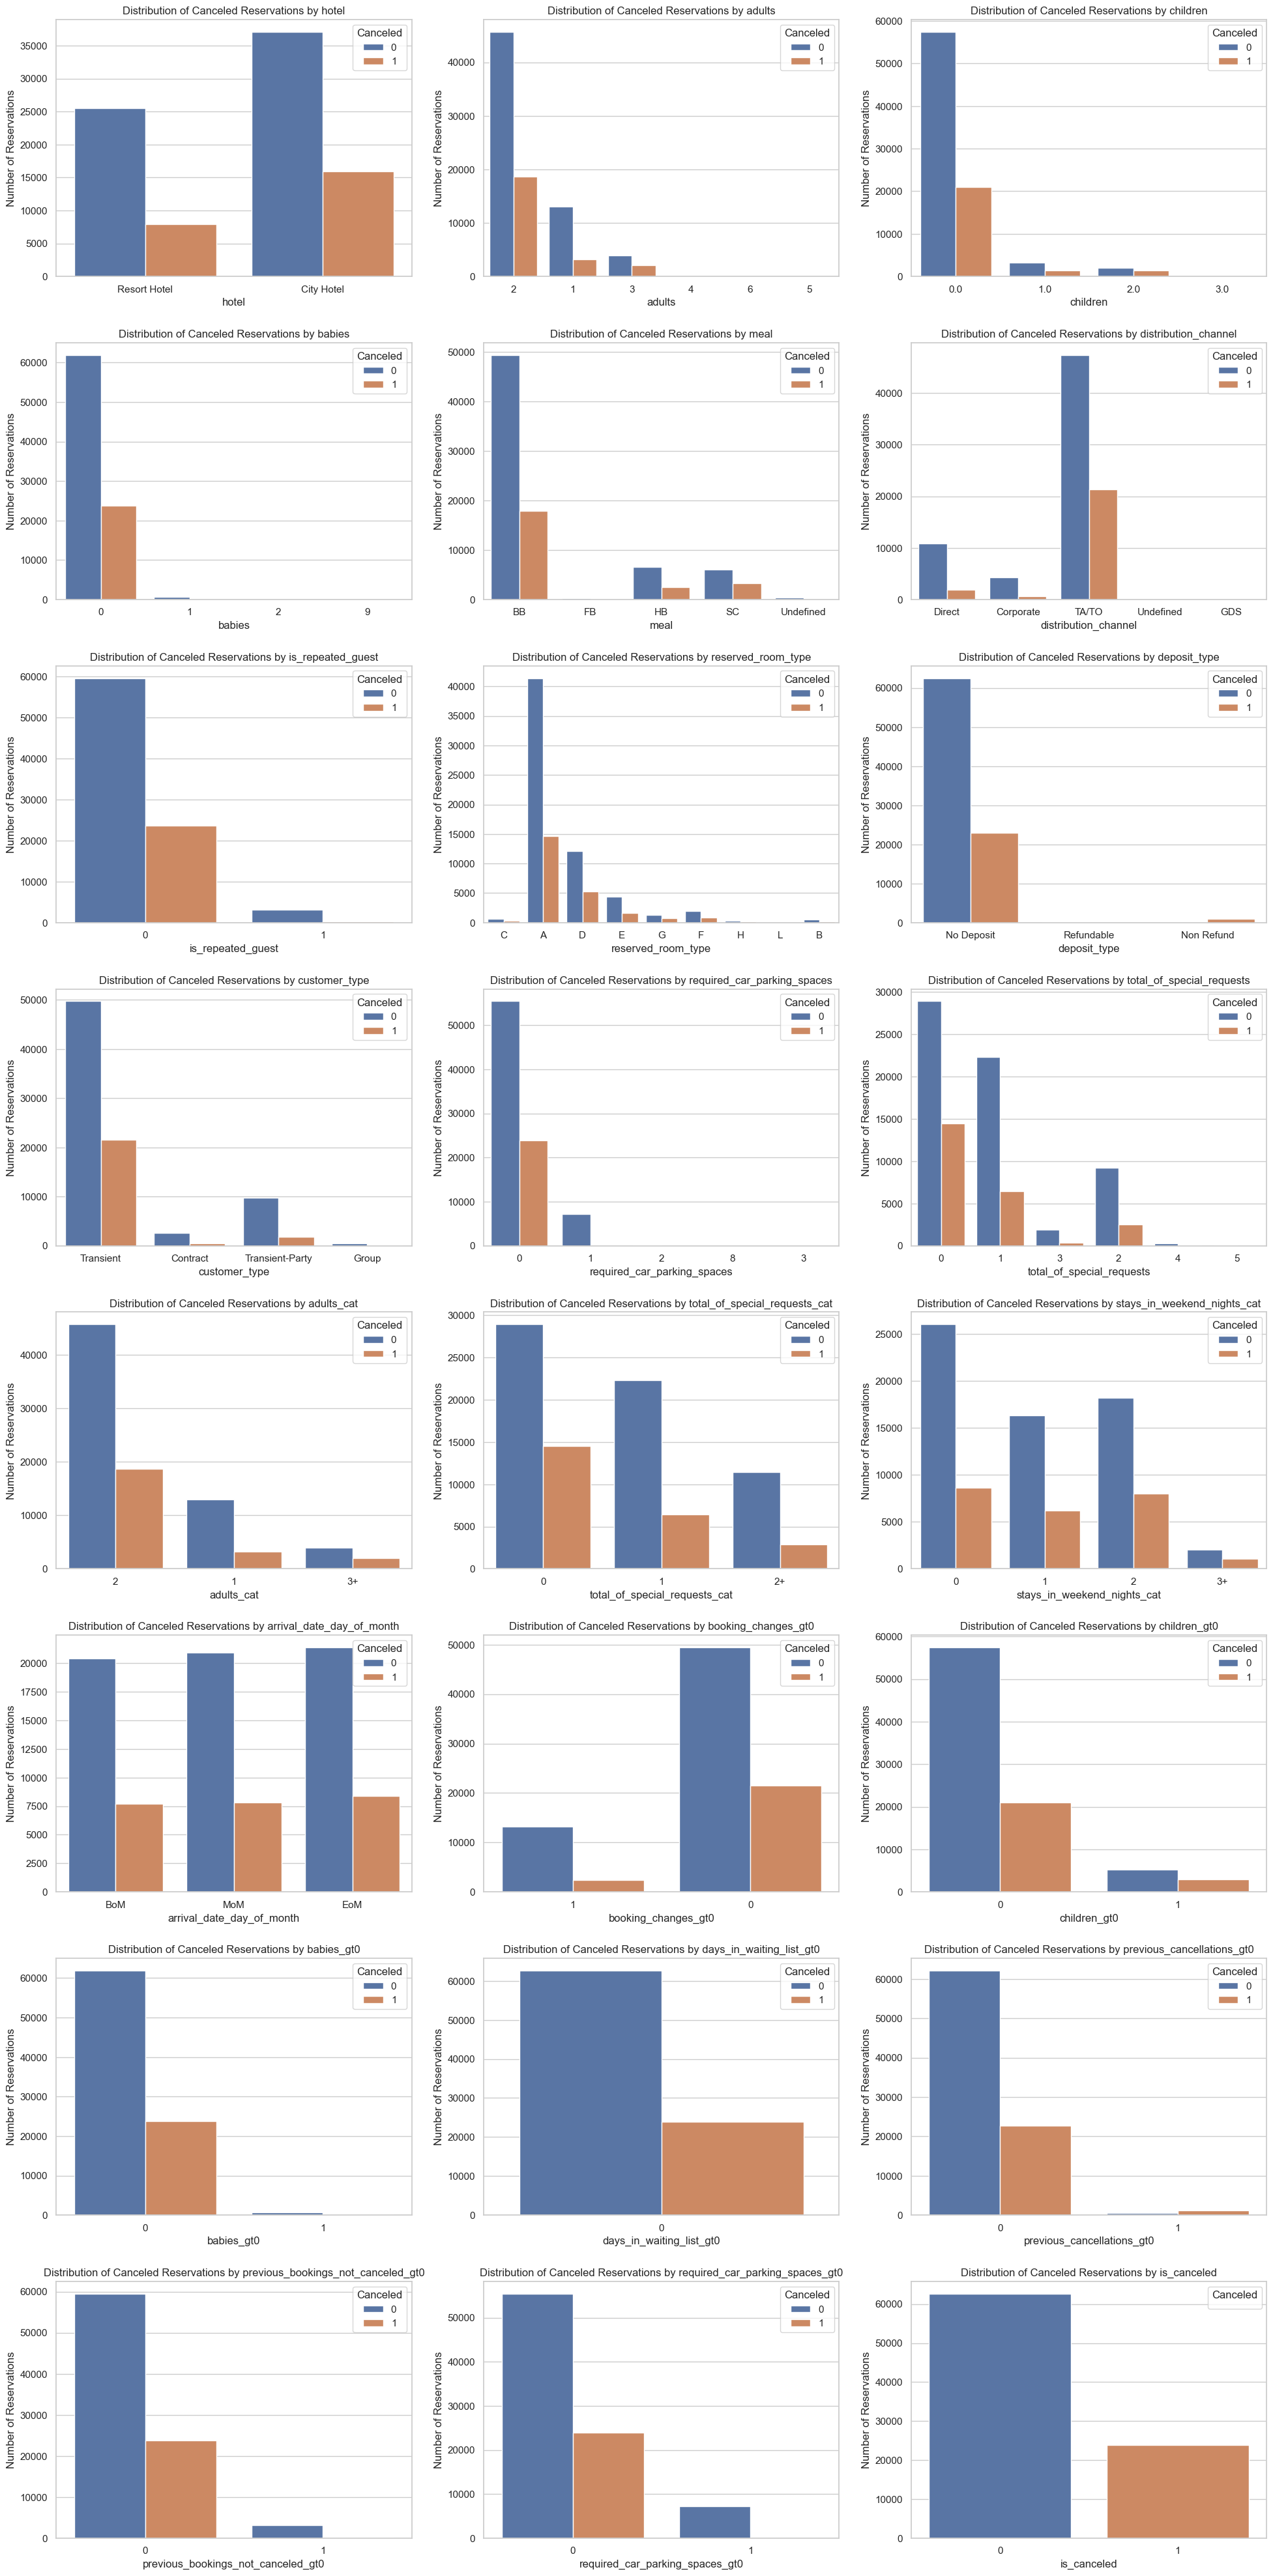

In [324]:
base_columns = [
    'hotel',
    'adults',
    'children',
    'babies',
    'meal',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'deposit_type',
    'customer_type',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'is_canceled'
]

derived_categorical = [
    'adults_cat',
    'total_of_special_requests_cat',
    'stays_in_weekend_nights_cat',
    'arrival_date_day_of_month',          # BoM / MoM / EoM
]

binary_flags = [
    'booking_changes_gt0',
    'children_gt0',
    'babies_gt0',
    'days_in_waiting_list_gt0',
    'previous_cancellations_gt0',
    'previous_bookings_not_canceled_gt0',
    'required_car_parking_spaces_gt0'
]

# Keep only those that actually exist
derived_plot_feats = [
    f for f in derived_categorical + binary_flags
    if f in df_feature_engineered.columns
]

columns = base_columns[:-1] + derived_plot_feats + ['is_canceled']  # keep target last

print("Plotting columns:", columns)

canceled_countplot(df_feature_engineered[columns])

We have Quasi-constant features, for example when required_car_parking_spaces_gt0 = 1, we only have not canceled. This may be a problem because the model can give that quasi-constant feature big importance and always predict not_canceled when required_car_parking_spaces_gt0 = 1. We won't drop these features yet, as they might be genuinely predictive.

We will do the following:
- Use cross-validation to verify the pattern holds across folds
- Check test set performance - if it drops significantly, then it's overfitting
- Monitor feature importance - if a quasi-constant feature dominates, that's a red flag

The key question: Is this a data artifact or a real business pattern? If guests who request parking genuinely never cancel, that's valuable information. If it's a sampling issue in your dataset, it's overfitting.

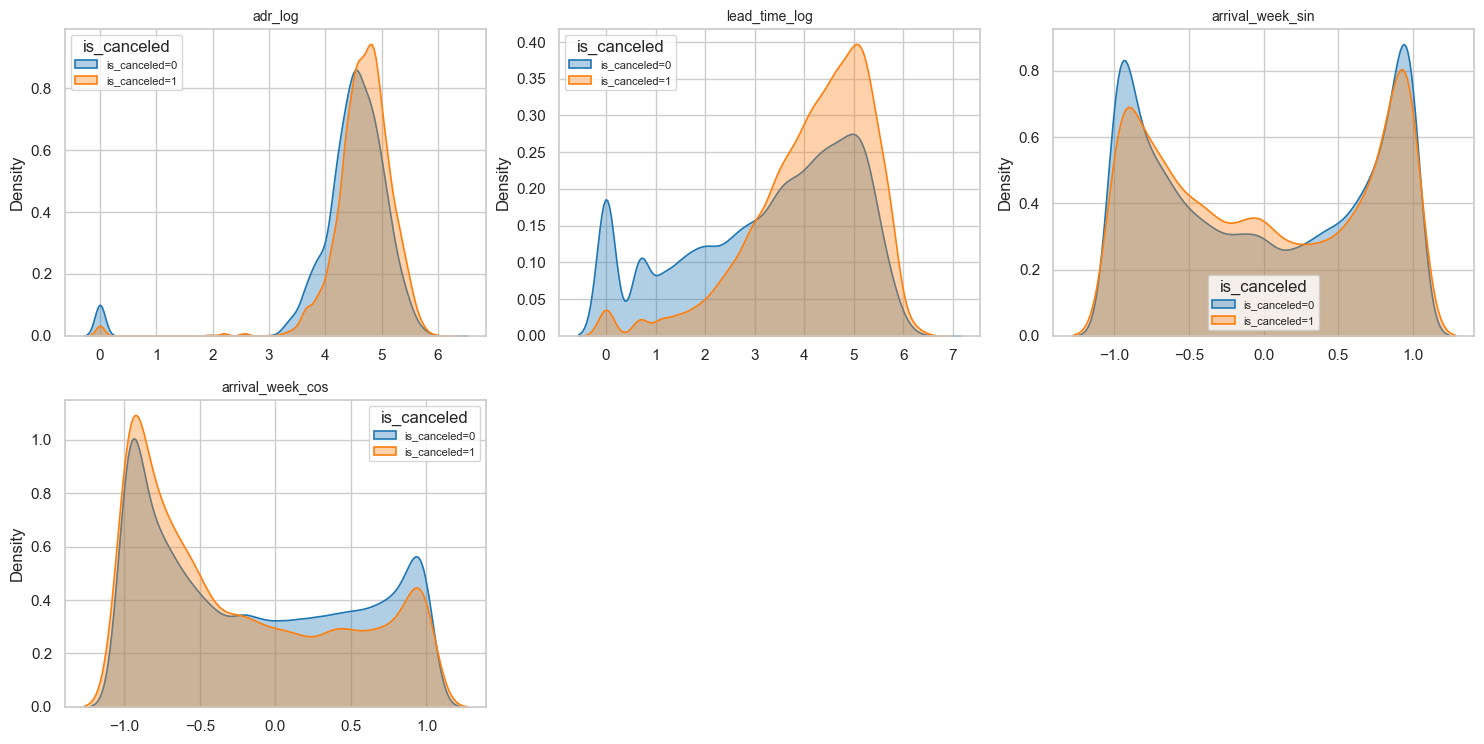

In [336]:

def canceled_numeric_distplot(
    df,
    cols = None,
    target = 'is_canceled',
    kind = 'kde',          # 'hist' or 'kde'
    bins = 30,
    n_cols = 3,
    exclude_binary = True,
    fill = False,           # only used for KDE
    palette = ('tab:blue','tab:orange'),
    xlim = None
):
    """
    Plot distributions of numeric features split by target.
    kind='hist': stacked outline histograms with hue
    kind='kde' : class-wise KDE overlays
    cols: optional list of columns to plot
    """
    import math

    if cols is None:
        cols = [
            c for c in df.columns
            if pd.api.types.is_numeric_dtype(df[c]) and c != target
        ]
        if exclude_binary:
            cols = [c for c in cols if df[c].nunique() > 2]

    if not cols:
        print("No numeric columns to plot.")
        return

    # Keep only existing / numeric
    cols = [c for c in cols if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

    classes = sorted(df[target].dropna().unique())
    n_features = len(cols)
    n_rows = math.ceil(n_features / n_cols)

    sns.set_theme(style='whitegrid')
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3.8*n_rows))
    axes = np.array(axes).reshape(-1)

    for ax, col in zip(axes, cols):
        if kind == 'hist':
            sns.histplot(
                data=df,
                x=col,
                hue=target,
                bins=bins,
                element='step',
                stat='density',
                common_norm=False,
                alpha=0.45,
                ax=ax
            )
        elif kind == 'kde':
            for idx, cls in enumerate(classes):
                subset = df[df[target] == cls]
                if subset[col].notna().sum() == 0:
                    continue
                sns.kdeplot(
                    data=subset,
                    x=col,
                    fill=fill,
                    common_norm=False,
                    alpha=0.35 if fill else 0.9,
                    linewidth=1.2,
                    ax=ax,
                    color=palette[idx % len(palette)],
                    label=f"{target}={cls}"
                )
        else:
            raise ValueError("kind must be 'hist' or 'kde'")

        ax.set_title(col, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Density")
        if xlim:
            ax.set_xlim(xlim)
        if kind == 'hist':
            ax.legend_.set_title(target)
        else:
            ax.legend(title=target, fontsize=8)

    for ax in axes[len(cols):]:
        ax.remove()

    plt.tight_layout()
    plt.show()
    return fig, axes

# Examples:
# KDE for selected columns
canceled_numeric_distplot(df_feature_engineered, cols = ['adr_log','lead_time_log', 'arrival_week_sin', 'arrival_week_cos'], kind = 'kde', fill = True);

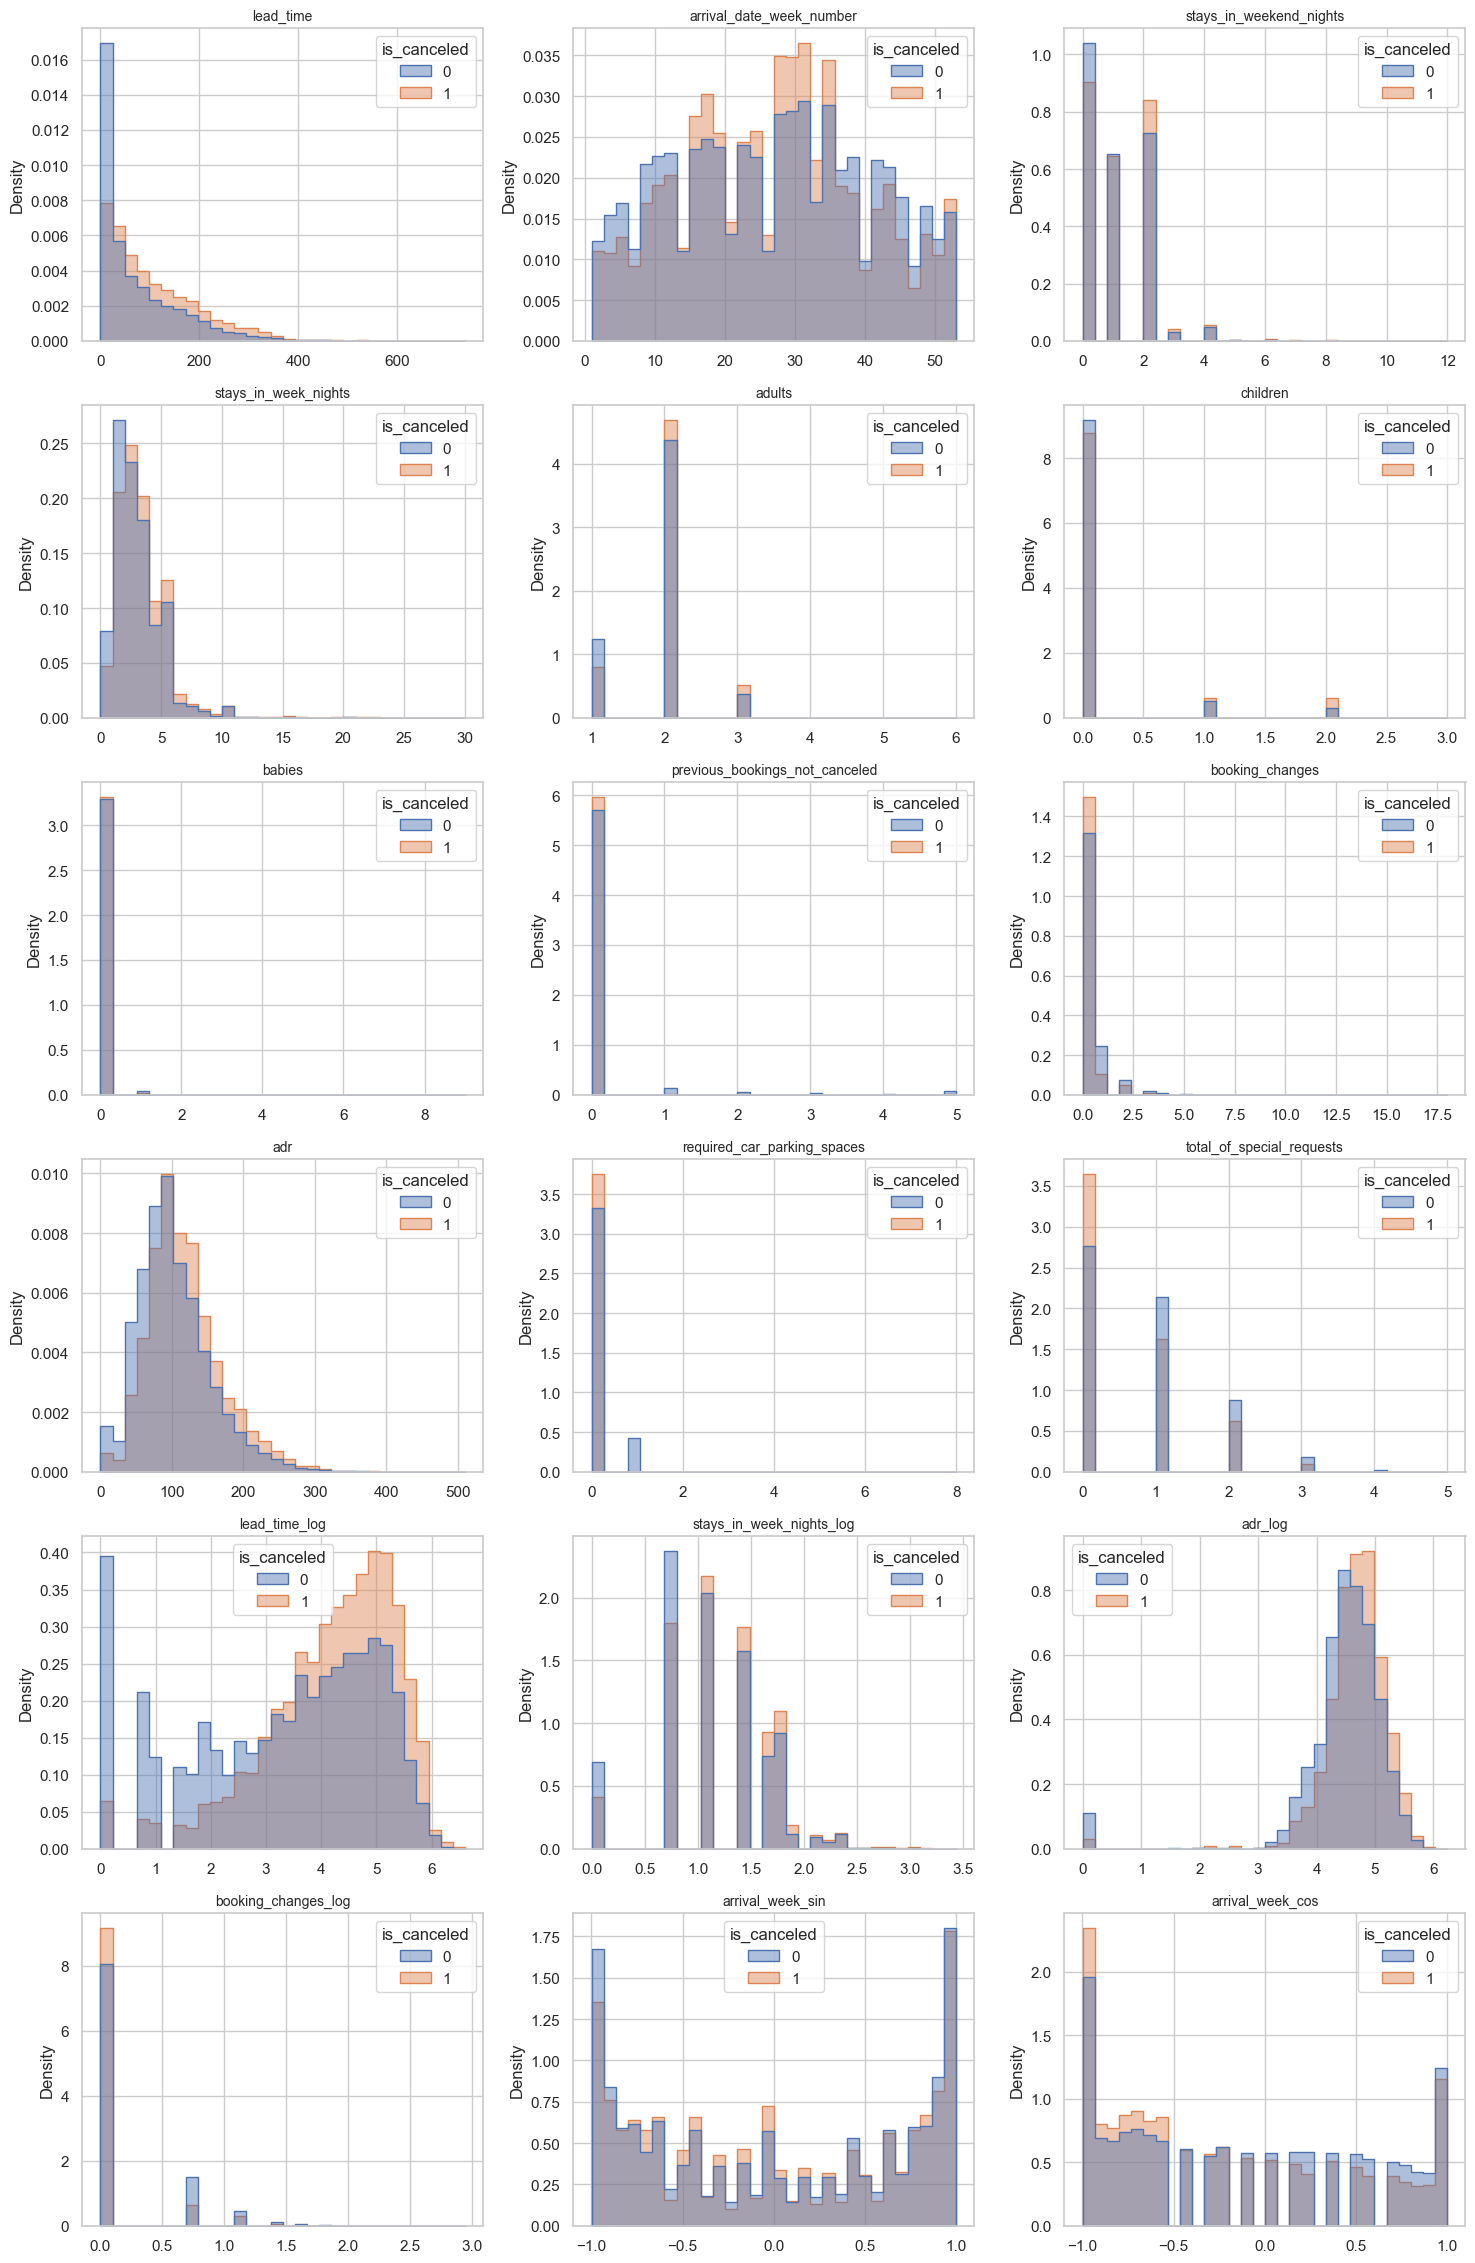

In [335]:
canceled_numeric_distplot(df_feature_engineered, kind='hist');

Now with these insights we will build a data preprocessing pipeline and start modelling.